# 10 Years Of Kickstarter Crowdfunding - Data Exploration
**by Marie-Luise Klaus**

# Table of contents
1. [Introduction](#introduction)
2. [Preliminary Wrangling](#preliminarywrangling)
3. [Utilities](#utilities)
4. [Descriptive Statistics](#descriptivestatistics)
5. [Univariate Exploration](#univariateexploration)
6. [Bivariate Exploration](#bivariateexploration)
7. [Multivariate Exploration](#multivariateexploration)

# Introduction <a name="introduction"></a>

**Crowdfunding on Kickstarter**  
  
This notebook is dedicated to exploratory data analysis of the 10th anniversary of the crowdfunding platform Kickstarter. Crowdfunding is a rather new form of finance to fund project or ventures. On Internet platforms, typically small amounts of money are being raised by a large number of people. Kickstarter is one of the most popular crowdfunding websites in the Western world, which was launched in April 2009 in the USA. While there are many different platforms, they may fundamentally differ from their focus, audience and services. Kickstarter’s focus is mainly creative: According to their website _**“Kickstarter helps artists, musicians, filmmakers, designers, and other creators find the resources and support they need to make their ideas a reality.”**_

Project _**creators**_ choose a _**deadline**_ and a funding _**goal**_ and present their project on the platform to gather money from the public. People who back the project (_**backers**_) by _**pledging**_ money are assured tangible rewards, depending on the amount. Unlike other opportunities of investment, Kickstarter does not allow to distribute shares of a venture to supporters; nor do they claim any ownership over the projects. If the goal is not met, the funds will not be distributed. While Kickstarter is mainly open for project creators in the USA, Canada, UK, Australia, New Zealand, Mexico and parts of the EU, project support is allowed by people from all around the world. 

https://www.kickstarter.com/

**Kickstarter Data**  
 The Kickstarter data set was gathered in April 2019 from an automated web scraping service: web robots. They have been publishing monthly project data of all ongoing and completed Kickstarter projects and released it to the public. Due to a lack of documentation provided by the source, I interpreted the data to the best of my belief. Insofar, I cannot guarantee for validity and completeness of the data and take no liability for misinterpretation of the results. On the positive side,  I did not encounter any inconsistencies during the wrangling and analysis processes and when collating data with Kickstarter’s project archive. Please refer to the data wrangling Jupyter Notebook to gain more information on the wrangling process. 

https://webrobots.io/kickstarter-datasets/


Throughout the course of this notebook I will have these two questions in mind. Based on the aforementioned data:

- How did the crowdfunding activities on Kickstarter develop over the past 10 years?
- What are predictors for successful project fundings?

To get started, let's import our libraries and set plots to be embedded inline.

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# uncomment the below settings to avoid collapsing of dataframes
pd.set_option('display.max_rows', 2500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,}'.format # display execution times
sns.set_style("whitegrid")

# Preliminary Wrangling <a name="preliminarywrangling"></a>
To begin, I import my data from several files and combine them into a single data frame. Subsequently, I assess the dataset to clean it from remaining issues.

In [346]:
# read in 5 files and concatinate the data into a single data frame
file_name =  './data/kickstarter_master{}.csv'
master_df = pd.concat([pd.read_csv(file_name.format(i)) for i in range(1,5)])
master_df.reset_index(drop=True, inplace=True)

## Assessing and Cleaning the Data

In [347]:
# show amount of rows and features
master_df.shape

(182823, 32)

In [348]:
# inspect features, null values and data types
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182823 entries, 0 to 182822
Data columns (total 32 columns):
project_id                 182823 non-null int64
project_name               182823 non-null object
url                        182823 non-null object
blurb                      182823 non-null object
category                   182823 non-null object
subcategory                182823 non-null object
image                      182823 non-null object
slug                       182823 non-null object
created_at                 182823 non-null object
launched_at                182823 non-null object
deadline                   182823 non-null object
state_changed_at           182823 non-null object
last_update_at             182823 non-null object
status                     182823 non-null object
creator_id                 182823 non-null int64
creator_name               182822 non-null object
country                    182814 non-null object
city                       182823 non-nul

In [349]:
# inspect 10 examples of the data in the dataset
master_df.sample(10)

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,deadline,state_changed_at,last_update_at,status,creator_id,creator_name,country,city,state,displ_loc,loc_type,backers_count,featured,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
84316,2127304,BUTELKA (Canceled),https://www.kickstarter.com/projects/1539404941/butelka,The glass bottle wrapped in leather. Portable. Non-toxic. Beautifully handcrafted. Perfect for the outdoors.,Crafts,Glass,https://ksr-ugc.imgix.net/assets/012/255/588/c856662f49395d003ba93393de8545c9_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463747015&auto=format&frame=1&q=92&s=4f794eb9e7cf19545bd75621775e8eda,butelka,2015-09-17 08:54:55,2016-04-11 18:26:33,2016-05-12 18:26:33,2016-05-08 20:07:58,2015-09-17 08:54:56,canceled,1539404941,Our Leather,RO,Bucharest,Bucuresti,"Bucharest, Romania",Town,65,no support,CAD,"8,800.0","6,670.739549868721","6,867.424968975161","6,333.0","4,800.658360149842","4,942.2048100590555",1.3191940615,1.2814118887
80596,2507622,Raised on Ritalin - A Graphic Novel/Memoir about ADHD,https://www.kickstarter.com/projects/tylerpage/raised-on-ritalin-a-graphic-novel-memoir-about-adh,"I've spent 39 years living with ADHD. How did it affect my life, work, and family? Is it even real? Where does it come from?",Comics,Graphic Novels,https://ksr-ugc.imgix.net/assets/012/448/264/db63068e26324f2ff46942eed263b032_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463761639&auto=format&frame=1&q=92&s=4b70bb5833f7867ec26b235243c97a7a,raised-on-ritalin-a-graphic-novel-memoir-about-adh,2016-05-09 18:55:58,2016-05-24 15:32:58,2016-06-23 15:32:58,2016-06-23 15:32:59,2016-11-07 03:05:29,successful,392794416,tyler page,US,Minneapolis,MN,"Minneapolis, MN",Town,425,full support,USD,"6,000.0","6,000.0","6,000.0","9,280.0","9,280.0","9,280.0",1.0,1.0
71802,2576427,Lark Remy | EP Pre-order & Physical Release Fundraiser,https://www.kickstarter.com/projects/68705052/lark-remy-ep-pre-order-and-physical-release-fundra,Fundraiser for the physical release of Lark Remy's follow-up EP,Music,Electronic Music,https://ksr-ugc.imgix.net/assets/012/871/986/232638f1e12824f37d8470d106e15f32_original.png?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1473535104&auto=format&frame=1&q=92&s=0d0d41e8c6ec1cdb3bbd999ddace1c50,lark-remy-ep-pre-order-and-physical-release-fundra,2016-06-27 05:09:10,2016-09-23 15:39:24,2016-10-23 15:39:24,2016-10-23 15:39:25,2016-11-12 19:01:01,successful,68705052,Lark Remy,US,Seattle,WA,"Seattle, WA",Town,32,spotlight,USD,300.0,300.0,300.0,"1,003.0","1,003.0","1,003.0",1.0,1.0
13087,3502549,Don and Hillary hit the Apocalypse. 28mm Zombie Miniatures,https://www.kickstarter.com/projects/676985183/don-and-hillary-hit-the-apocalypse-28mm-zombie-min,Donald and Hillary hit the Apocalypse! 28mm Zombie and Zombie Hunting miniatures to bring true horror to the atomic holocaust.,Games,Tabletop Games,https://ksr-ugc.imgix.net/assets/023/065/848/31b4eb4863855285639bae641478ae40_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1540832189&auto=format&frame=1&q=92&s=1b2633328588e393d1b2c51acf41f183,don-and-hillary-hit-the-apocalypse-28mm-zombie-min,2018-10-29 16:26:35,2018-11-12 22:07:43,2018-12-27 22:07:43,2018-12-27 22:07:43,2018-10-29 16:26:35,successful,676985183,Joe Corsaro,US,02346,MA,"Middleboro, MA",Zip,65,spotlight,USD,"1,000.0","1,000.0","1,000.0","1,962.94","1,962.94","1,962.94",1.0,1.0
56269,2956268,1977 EPA Graphic Standards System reissue,https://www.kickstarter.com/projects/thestandardsmanual/reissue-of-the-1977-epa-graphic-standards-system,"Designed by firm Chermayeff & Geismar Associates and partner Steff Geissbühler, reissued as a hardcover book in 14 Pantone® colors.",Design,Graphic Design,https://ksr-ugc.imgix.net/assets/016/204/363/548681fc9413ed4cfd470dd9d772cf3c_original.PNG?ixlib=rb-1.1.0&crop=faces&w=352&h=198&f

**Null values**  
Notice one observation with an empty creator name. It shouldn't cause any problems in the analysis. Also missing states won't bother, since there are locations like New Zealand or Antarctica, where states as organisational territories don't exist.

However, there are empty values in _country_ of some observations. The assessment shows, the country Namibia, short "NA" was interpreted as a null value after we read in our csv files. Let's correct that. 

In [350]:
# there is one project without the name of creator
master_df[master_df.creator_name.isna()]

,project_id,project_name,url,blurb,category,subcategory,image,slug,created_at,launched_at,deadline,state_changed_at,last_update_at,status,creator_id,creator_name,country,city,state,displ_loc,loc_type,backers_count,featured,currency,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
93242,2298709,Cannabis Colouring Book,https://www.kickstarter.com/projects/498969171/cannabis-colouring-book,"A Cannabis Colouring Book, 20 black and white prints by a Fine Artist",Art,Conceptual Art,https://ksr-ugc.imgix.net/assets/012/342/732/d13264538144cbd88347a1b50579e6e4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463756060&auto=format&frame=1&q=92&s=34c74564f1ce4b2795e93c1644d68674,cannabis-colouring-book,2015-12-31 05:21:47,2015-12-31 18:31:24,2016-01-30 18:31:24,2016-01-30 18:31:24,2015-12-31 05:21:47,failed,498969171,NaN,US,Chicago,IL,"Chicago, IL",Town,1,no support,USD,"2,500.0","2,500.0","2,500.0",4.2,4.2,4.2,1.0,1.0


In [351]:
# assess null values in state
master_df[master_df.state.isna()][['state','country', 'displ_loc', 'city']].sample(5)

,state,country,displ_loc,city
3490,NaN,NZ,"Rotorua, NZ",Rotorua
95458,NaN,AQ,Antarctica,Antarctica
87359,NaN,AQ,Antarctica,Antarctica
34489,NaN,GI,"Gibraltar, Gibraltar",Gibraltar
123383,NaN,NZ,"Taihape, NZ",Taihape


In [352]:
# several projects with missing state
master_df[master_df.country.isna()][['country', 'displ_loc']]

,country,displ_loc
11996,NaN,"Windhoek, Namibia"
35813,NaN,"Walvis Bay, Namibia"
54174,NaN,"Windhoek, Namibia"
70164,NaN,"Windhoek, Namibia"
81780,NaN,"Tsumkwe, Namibia"
96734,NaN,"Rundu, Namibia"
96796,NaN,"Okahandja, Namibia"
101341,NaN,"Windhoek, Namibia"
181774,NaN,"Walvis Bay, Namibia"


In [353]:
# replace NaN by "NA"
master_df.country.fillna("NA", inplace=True)

# test
master_df[master_df.country.isna()][['country', 'displ_loc']]

,country,displ_loc


In [354]:
# duplicates
master_df.duplicated().sum()

0

**Outliers**  

The descriptive statistics below reveal an extreme range of values for the number backers, project goals and the actual amount pledged. For example, the amount pledged varies between USD 0.00 to more than USD 81 mi. (converted to USD in their historic exchange rate). For my further analysis, I will need to pay extra attention to outliers and extreme values.

In [355]:
# show descriptive statistics of each numeric variable
master_df.describe()

,project_id,creator_id,backers_count,goal_real,goal_current_usd,goal_hist_usd,pledged_real,pledged_current_usd,pledged_hist_usd,current_fx_rate(usd),hist_exchange_rate(usd)
count,"182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0","182,823.0"
mean,"2,134,008.0534013775","1,074,355,687.692052",133.19608036188006,"53,045.47494396218","43,610.41674456528","44,479.11088315567","15,576.358262472442","11,431.22118834541","11,564.410448010885",1.4719871868840078,1.4551578997548096
std,"1,067,350.4118824806","620,008,225.0301064",872.1391095687884,"1,253,273.100861694","1,140,903.3662680425","1,171,775.8831360221","276,843.9582965485","83,372.50657122987","83,809.367465106",4.538616102670615,4.643109675852995
min,19.0,3.0,0.0,0.01,0.01,0.01,0.0,0.0,0.0,0.7902527395000001,0.5826048629999999
25%,"1,316,340.0","537,632,655.5",3.0,"1,500.0","1,500.0","1,500.0",72.0,69.05895276617348,70.0,1.0,1.0
50%,"2,256,628.0","1,073,325,885.0",23.0,"5,000.0","5,000.0","5,000.0","1,252.0","1,218.0","1,243.026457903441",1.0,1.0
75%,"3,087,906.5","1,611,913,230.5",80.0,"15,000.0","13,579.200000288965","14,219.6926569536","6,061.145","5,755.0","5,853.187935164977",1.0,1.0
max,"3,713,426.0","2,147,483,434.0","105,857.0","100,000,000.0","126,541,794.79753642","150,099,318.94817606","81,030,744.0","10,441,174.430000003","10,441,174.430000003",107.4938140686,113.9401218152


**Time Variables and Project Duration**  

There are several time-related features to be converted to pandas date time format for analysis. 

The funding period of is one of the features a creator has to decide on before launching a project. I suppose it may affect the success of the campaign. I add the duration as a new feature as the difference of the time a project was launched from it's deadline.

In [356]:
# convert time data to date time format
master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']] = master_df[['created_at', 'launched_at', 'state_changed_at', 'deadline', 'last_update_at']].apply(pd.to_datetime)

In [357]:
# engineer variable to asses funding duration
master_df['duration'] = master_df['deadline'] - master_df['launched_at']
master_df[['launched_at', 'deadline', 'duration']].sample(5)

,launched_at,deadline,duration
12351,2018-11-20 20:51:05,2018-12-18 05:59:00,27 days 09:07:55
136655,2014-10-20 23:27:00,2014-11-20 00:27:00,30 days 01:00:00
30137,2018-04-23 13:06:44,2018-05-23 13:06:44,30 days 00:00:00
23921,2018-07-09 14:02:54,2018-07-31 23:00:00,22 days 08:57:06
175186,2012-04-15 19:31:32,2012-05-19 04:00:00,33 days 08:28:28


In [358]:
# the first project ever launched
first_project = master_df.sort_values(by='launched_at', ascending=True).iloc[0, :]
first_project[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        New York Makes a Book!!                                                                                                                             
blurb               Let's make the world's first crowd-funded book! \r\n\r\nNew York Makes a Book will be entirely composed of submissions from 100 participants. 100...
url                 https://www.kickstarter.com/projects/nymab/new-york-makes-a-book                                                                                    
launched_at         2009-04-28 11:55:41                                                                                                                                 
deadline            2009-05-16 09:59:00                                                                                                                                 
duration            17 days 22:03:19                                                                                                                       

In [359]:
# the latest launched project
latest_project = master_df.sort_values(by='launched_at', ascending=False).iloc[0, :]
latest_project[['project_name', 'blurb', 'url', 'launched_at', 'deadline', 'duration','goal_hist_usd', 'pledged_hist_usd','city']]

project_name        Pobasso and the Cucumbers - Historical Musical for Schools                                                                           
blurb               School Musical, set 300 years ago, focusing on the cultural and relationship between the Aboriginal people and the Macassan Fishermen
url                 https://www.kickstarter.com/projects/pobasso/pobasso-and-the-cucumbers-historical-musical-for-s                                      
launched_at         2019-04-18 04:49:38                                                                                                                  
deadline            2019-06-02 04:49:38                                                                                                                  
duration            45 days 00:00:00                                                                                                                     
goal_hist_usd      2,406.722637170395                                       

The first project on Kickstarter was launched 04/28/2009 and the latest project in my data set was launched by 04/18/2019. We got almost 10 years of Kickstarter data to analyse ahead.

**Categories**  
There are project categories and subcategories in our dataset. A subcategory may have different parent categories. For example subcategory "Web" may be of category "Technology" or "Journalism". In order to be explicit about categories, I create combined categories for each project.

In [360]:
# show example of subcategory with multiple parent categories
master_df[master_df.subcategory == 'Web'][['category', 'subcategory']].sample(5)

,category,subcategory
115064,Technology,Web
22274,Journalism,Web
130630,Journalism,Web
94891,Technology,Web
73468,Technology,Web


In [361]:
# create combined category
master_df['comb_cat'] = master_df['category'] + "/" + master_df['subcategory']
master_df[['category', 'subcategory','comb_cat']].sample(5)

,category,subcategory,comb_cat
132844,Film & Video,Shorts,Film & Video/Shorts
107732,Technology,Software,Technology/Software
149130,Games,Video Games,Games/Video Games
135006,Journalism,Web,Journalism/Web
9506,Film & Video,Shorts,Film & Video/Shorts


The first project on Kickstarter was launched 04/28/2009 and the latest project in my data set was launched by 04/18/2019. We got almost 10 years of Kickstarter data to analyse ahead.

**Project status**  
The value counts numbers of project statuses show a relatively small amount of unfinished projects. They were either canceled or suspended. By mid April 2019, there were an additional 3,945 projects currently open for pledges. As I am mostly interested in identifying success factors of Kickstarter campaigns, I'm going to focus on completed projects only. Below, I extract all successful and failed projects into a new data frame.

In [362]:
# show possible state of projects 
master_df.status.value_counts()

successful    95451
failed        74210
canceled      8587 
live          3945 
suspended     630  
Name: status, dtype: int64

In [363]:
# create a separate data frame for completed project only
ks_compl = master_df.query('(status == "successful") | (status == "failed")')
ks_compl.reset_index(drop=True, inplace=True)
ks_compl.status.value_counts()

successful    95451
failed        74210
Name: status, dtype: int64

**Data types**  
There are multiple variables left that should be of categorical data type. _Featured_ refers to the level of support Kickstarter applies to a project. Thus, I interpret _featured_ as an ordered category. 


In [364]:
# convert data types to category
ks_compl['country'] = ks_compl['country'].astype('category')
ks_compl['category'] = ks_compl['category'].astype('category')
ks_compl['subcategory'] = ks_compl['subcategory'].astype('category')
ks_compl['comb_cat'] = ks_compl['comb_cat'].astype('category')
ks_compl['status'] = ks_compl['status'].astype('category')

# convert featured to ordered category
featured_type = pd.CategoricalDtype(categories=['no support', 'Projects We Love', 'spotlight', 'full support'], ordered=True)
ks_compl['featured'] = ks_compl['featured'].astype(featured_type)

# show data types
ks_compl.dtypes

C:\Users\marie\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\marie\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\marie\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

project_id                 int64          
project_name               object         
url                        object         
blurb                      object         
category                   category       
subcategory                category       
image                      object         
slug                       object         
created_at                 datetime64[ns] 
launched_at                datetime64[ns] 
deadline                   datetime64[ns] 
state_changed_at           datetime64[ns] 
last_update_at             datetime64[ns] 
status                     category       
creator_id                 int64          
creator_name               object         
country                    category       
city                       object         
state                      object         
displ_loc                  object         
loc_type                   object         
backers_count              int64          
featured                   category       
currency   

In [365]:
# remove columns that are irrelevant to our analysis to keep our dataframe neat
ks_compl = ks_compl.drop(labels=['slug', 'created_at', 'last_update_at', 'state_changed_at', 'displ_loc',
                                 'goal_real', 'goal_current_usd','pledged_real', 'pledged_current_usd', 
                                 'current_fx_rate(usd)', 'hist_exchange_rate(usd)'], axis=1)
ks_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169661 entries, 0 to 169660
Data columns (total 23 columns):
project_id          169661 non-null int64
project_name        169661 non-null object
url                 169661 non-null object
blurb               169661 non-null object
category            169661 non-null category
subcategory         169661 non-null category
image               169661 non-null object
launched_at         169661 non-null datetime64[ns]
deadline            169661 non-null datetime64[ns]
status              169661 non-null category
creator_id          169661 non-null int64
creator_name        169660 non-null object
country             169661 non-null category
city                169661 non-null object
state               169615 non-null object
loc_type            169661 non-null object
backers_count       169661 non-null int64
featured            169661 non-null category
currency            169661 non-null object
goal_hist_usd       169661 non-null float64
pledg

**The structure of the dataset**  
This cleaned dataset contains information on 10 years of Kickstarter projects; from Kickstarter's launch in 04/2009 to 04/18/2019. In my analysis, I focus on completed projects only: projects that were either successfully funded or failed the funding. The dataset of completed projects is composed of 169,661 rows, each of which represents a project. 

As for the features of this dataset, there are 22 variables that have been selected. We got quantitative variables like goal or pledged, several time-related variables and qualitative data, like project categories, names and project states.  

_**Featured**_ is ordered categorical variables. It refers to the amount of support Kickstarter applies to a project. It is sorted in ascending order from no support to full support. Basically, Kickstarter has two ways of support. 

One possibility is that a project is awarded the badge "Projects We Love", meaning a project is being picked for recommendation by staff. The badge is shown on the project's description page.   
The second possibility of support refers to a project being highlighted in some way in different sections on their landing page. According to Kickstarter's guide, they may also advertise projects in their newsletters or social media channels. However, the data set does not provide any explanation or information how a project was spotlighted exactly.    
Obviously, projects may be supported in both ways.

 - _no support:_ Kickstarter does not spotlight a project on their website, nor award the _Projects We Love_ badge, 
 - _Projects We Love:_ Kickstarter awards _Projects We Love_ badge without any further spotlighting
 - _spotlight:_ Kickstarter spotlights a project in any way on their landing page without awarding a badge
 - _full support:_ Kickstarter spotlight a project on their landing page and awards the _Projects We Love_ badge

_**Currencies**_  
To allow comparison of the project's financial features, I chose to convert all currencies to USD, using their historic exchange rates of the date of the deadline of their funding period. Please refer to the wrangle notebook for further information. 

**Main feature of interest**  
The main feature that I will explore is the _status_ of a project. It depicts whether the crowdfunding was **successful or failed**.

**Supporting features**  
To understand success predictors of a crowdfunding, I expect the following factors may have an influence on the project:

- the amount of the initial funding goal: _goal hist usd_
- the number of backers: _backers count_
- the support provided by Kickstarter: _featured_
- the project categories: _category, subcategory, comb cat_
- the dates of the project's launch and deadline: _launched at_, _deadline_
- the duration period of a funding: _duration_
- the location of a project: _country_, _loc type_.


# Utilities <a name="utilities"></a>

In this section, I set up commonly used variables and functions that come in handy for my analysis. 

In [366]:
# Create separate data frames for successful and failed projects
ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_failed = ks_compl[ks_compl.status == "failed"]

In [367]:
# create dataframes containing yearly project counts
ks_year_count = ks_compl.copy()
ks_year_count = ks_year_count.groupby([ks_year_count.deadline.dt.year]).project_id.count()
ks_year_count = ks_year_count.reset_index(name='count_year')

# create dataframe containing monthly project counts
ks_month_count = ks_compl.copy()
ks_month_count = ks_month_count.groupby([ks_month_count.deadline.dt.month]).project_id.count()
ks_month_count = ks_month_count.reset_index(name='count_month')

In [515]:
# set commonly used colors used during plotting 
cust_green = '#66cdaa'
cust_red = '#f08080'
cust_blue = '#43a2ca'
status_colors = [cust_green, cust_red]
cust_purple = sns.color_palette("Pastel1")[3]
cust_blues = sns.color_palette("Blues_r")[3]
feat_color = sns.color_palette("Set1")
fill_red = '#fee0d2'
fill_green = '#e0f3db'
goal_color =  "#dd1c77"
pledged_color = "#c994c7"

In [369]:
# to improve readability of large numbers 
def format_num(num):
    num = round(float(num))
    formatted_num = str(num)
    str_length = len(formatted_num)
    cursor = str_length % 3
    if str_length > 3 and cursor > 0:
        formatted_num = formatted_num[0:cursor] + "," + formatted_num[cursor:] 
        cursor += 1
        str_length = str_length - cursor
    while str_length > 3:
        formatted_num = formatted_num[0:cursor+3] + "," + formatted_num[cursor+3:]
        cursor += 4
        str_length -= 3
    return formatted_num

In [370]:
# frequently used variable names
month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September","October", "November", "December"]


# Descriptive Statistics <a name="descriptivestatistics"></a>
Let's start by calculating descriptive statistics of the Kickstarter features.

**How many projects were completed in by Kickstarter's 10th anniversary?**

In [371]:
n_compl_projects = ks_compl.project_id.nunique()
format_num(n_compl_projects)

'169,661'

**How many creators contributed by Kickstarter's 10th anniversary?**

In [372]:
creators_unique = ks_compl.creator_id.nunique()
format_num(creators_unique)

'147,269'

In [373]:
# descriptive statistics of numeric values
ks_compl[['backers_count', 'goal_hist_usd', 'pledged_hist_usd', 'duration']].describe()

,backers_count,goal_hist_usd,pledged_hist_usd,duration
count,"169,661.0","169,661.0","169,661.0",169661
mean,139.4416453987658,"40,906.12771538828","12,072.580720515753",32 days 15:20:33.490142
std,878.2222230108724,"1,106,030.4164593664","82,701.06921244746",11 days 17:34:03.030301
min,0.0,0.01,0.0,1 days 00:00:00
25%,3.0,"1,500.0",100.0,29 days 23:00:00
50%,26.0,"5,000.0","1,471.0",30 days 00:00:00
75%,85.0,"13,193.87635772584","6,256.0",34 days 02:04:05
max,"105,857.0","150,099,318.94817606","8,596,474.58",93 days 02:32:04


**How many backers supported completed projects by Kickstarter's 10th anniversary?**

In [374]:
backers_sum = ks_compl.backers_count.sum()
format_num(backers_sum)

'23,657,809'

**What are the chances to complete projects successfully?**   
First, assess the success probabilities of all campaigns. Second, calculate the success probabilities for completed projects only. 

In [375]:
# calculate total counts of each status from the master data set
n_success = len(master_df[master_df.status == "successful"])
n_failed = len(master_df[master_df.status == "failed"])
n_live = len(master_df[master_df.status == "live"])
n_canceled = len(master_df[master_df.status == "canceled"])
n_suspended = len(master_df[master_df.status == "suspended"])
n_not_live = len(master_df[master_df.status != "live"])

In [376]:
# status probability of all projects that are currently not live
p_success = n_success / n_not_live
p_failed = n_failed / n_not_live
p_canceled = n_canceled / n_not_live
p_suspended = n_suspended / n_not_live
print("Currently open for pledges: {}".format(format_num(n_live)))
print("Successful projects: {}%".format(round(p_success*100,2)))
print("Failed projects: {}%".format(round(p_failed*100, 2)))
print("Canceled projects: {}%".format(round(p_canceled*100, 2))) 
print("Suspended projects: {}%".format(round(p_suspended*100, 2))) 

Currently open for pledges: 3,945
Successful projects: 53.36%
Failed projects: 41.49%
Canceled projects: 4.8%
Suspended projects: 0.35%


In [377]:
# status probability of ordinarily completed projects
n_compl_success = len(ks_compl[ks_compl.status == "successful"])
n_compl_fail = len(ks_compl[ks_compl.status == "failed"])
p_compl_success = n_compl_success / n_compl_projects
p_compl_fail = n_compl_fail / n_compl_projects
print("Success: {}%".format(round(p_compl_success*100,2)))
print("Failed: {}%".format(round(p_compl_fail*100, 2)))

Success: 56.26%
Failed: 43.74%


**How many projects do creators usually run?**

In [378]:
# number of unique project creators
n_compl_creators_unique = ks_compl.creator_id.nunique()
format_num(n_compl_creators_unique)

'147,269'

In [379]:
# project counts per user
power_users = (ks_compl['creator_id'].value_counts()
        .reset_index()
        .rename(index=str, columns={"creator_id": "project_count"})['project_count']
        .value_counts()
        .reset_index()
        .rename(index=str, columns={"index": "project_count", "project_count": "creator_count"})
        .sort_values(by='project_count', ascending=False))

print(f"Proportion of users with 1 project: {round(power_users['creator_count'].values[-1] / n_compl_creators_unique,2)*100}%")
print(f"Proportion of users with 2 project: {round(power_users['creator_count'].values[-2] / n_compl_creators_unique,2)*100}%")
power_users

Proportion of users with 1 project: 91.0%
Proportion of users with 2 project: 6.0%


,project_count,creator_count
35,70,1
32,58,1
26,52,1
27,36,1
28,34,1
29,33,1
25,32,1
31,31,1
24,30,2
23,27,2


In [380]:
# What kind of projects do the most active user most active user launch?
creators_ordered = ks_compl.creator_id.value_counts().index
print(f"username: {ks_compl[ks_compl.creator_id == creators_ordered[0]]['creator_name'].iloc[0]}\n")
ks_compl[ks_compl.creator_id == creators_ordered[0]]

username: Collectable Playing Cards



,project_id,project_name,url,blurb,category,subcategory,image,launched_at,deadline,status,creator_id,creator_name,country,city,state,loc_type,backers_count,featured,currency,goal_hist_usd,pledged_hist_usd,duration,comb_cat
7690,3504998,Bicycle Stained Glass Leviathan Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-stained-glass-leviathan-playing-cards,The Leviathan Sea Monster takes form as the 3rd edition in the Stained Glass Series.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/023/106/899/546300f9aaa4639b67d4f1c1fdf613c4_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1541093879&auto=format&frame=1&q=92&s=1b23fe9f9f96f9682cc5cbe6b6d432e7,2018-11-26 19:35:05,2018-12-26 19:35:05,successful,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,634,spotlight,USD,"4,000.0","13,687.0",30 days 00:00:00,Games/Playing Cards
11684,3372265,BICYCLE MARBLE Playing Cards by Max,https://www.kickstarter.com/projects/2104052526/bicycle-marble-playing-cards-by-max,The NEW GENERATION of the TEXTURE SERIES by Max (Max Playing Cards),Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/478/957/e96e0d3d393a63dacfd7e344d129c6ef_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1528219862&auto=format&frame=1&q=92&s=6209fd92d37889a1b6fa54e1c2b2d4c3,2018-10-10 15:09:57,2018-11-09 16:09:57,failed,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,305,no support,USD,"13,000.0","10,612.0",30 days 01:00:00,Games/Playing Cards
13023,3460006,Bicycle Limited Edition Bald Eagle Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-bald-eagle-playing-cards,"The emblem bird of the United States The Bald Eagle, is now a limited edition Bicycle playing card deck. Only 1100 decks will printed.",Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/396/885/5ff1a0277e1888ba564c60ced85a6e79_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1535652459&auto=format&frame=1&q=92&s=2d6e0c095b7076b751b578a6e9c6a2b5,2018-09-25 18:01:14,2018-10-25 18:01:14,successful,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,111,spotlight,USD,"3,000.0","3,523.0",30 days 00:00:00,Games/Playing Cards
15224,3455599,Bicycle Explostar Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-cardistry-explostar-playing-cards,Collectable Playing Cards first Cardistry deck is ready and set to explode onto the scene!,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/022/434/593/3614340c9b7ee19263c6e965308a0a49_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1536003495&auto=format&frame=1&q=92&s=26a8eb63300ff6bfade972d51951e06a,2018-08-30 16:18:25,2018-09-29 16:18:25,successful,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,205,spotlight,USD,"4,000.0","4,755.0",30 days 00:00:00,Games/Playing Cards
16640,3427450,Bicycle Limited Edition Gyrfalcon Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-limited-edition-gyrfalcon-playing-cards,The largest falcon in the world now a limited edition Bicycle playing cards deck. Only 1100 decks will be printed.,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/929/296/8d2e381918b619c18c29c95aa4b644fd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1533147729&auto=format&frame=1&q=92&s=70452f0ae9587e62d6e39ad6ca6452b3,2018-08-10 16:07:32,2018-09-09 16:07:32,successful,2104052526,Collectable Playing Cards,US,Lexington,KY,Town,325,spotlight,USD,"2,500.0","9,533.0",30 days 00:00:00,Games/Playing Cards
21416,3393416,Bicycle Antiques Playing Cards,https://www.kickstarter.com/projects/2104052526/bicycle-antiques-playing-cards,Travel back in time with the Bicycle Antiques Deck,Games,Playing Cards,https://ksr-ugc.imgix.net/assets/021/410/331/381c47b3818858487e85c739bf52bce6_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1527704269&auto=format&frame=1&q=92&s=abf9a7ec8eb63b29cc414553a2bea5d9,2018-06-08 17:58:10,2018-07-08 17:58:10,failed,2104052526,C

While the majority of users launched one project, the user with the name "Collectable Playing Cards" stands out. With 70 launched projects to finance bicycle-themed playing cards, they launched are the top of creators with the highest number of projects. 

**What are the projects with the highest goals?**  

In [381]:
# highest goal
highest_goal =  ks_compl.sort_values('goal_hist_usd')['goal_hist_usd'].index[-1]
# highest successful goal
highest_goal_s =  ks_compl_success.sort_values('goal_hist_usd')['goal_hist_usd'].index[-1]
# show
ks_compl.iloc[[highest_goal, highest_goal_s ]]

,project_id,project_name,url,blurb,category,subcategory,image,launched_at,deadline,status,creator_id,creator_name,country,city,state,loc_type,backers_count,featured,currency,goal_hist_usd,pledged_hist_usd,duration,comb_cat
87802,2200338,A Celtic Lovestory,https://www.kickstarter.com/projects/245190432/a-celtic-lovestory,"A 2000 year old ""Romeo & Juliet"" love story, set amidst the dramatic changes that ripped through Celtic Britain when Rome invaded...",Film & Video,Drama,https://ksr-ugc.imgix.net/assets/012/292/886/67f8879c113e174e1f41465297cdd035_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463752126&auto=format&frame=1&q=92&s=de2553e2d761e5821f69e8612f6e34c1,2015-11-16 23:47:15,2015-11-30 22:01:00,failed,245190432,Joe,GB,Dorset,England,County,0,no support,GBP,"150,099,318.94817606",0.0,13 days 22:13:45,Film & Video/Drama
88429,2193016,Bring Back MYSTERY SCIENCE THEATER 3000,https://www.kickstarter.com/projects/mst3k/bringbackmst3k,"Almost there! MYSTERY SCIENCE THEATER 3000 will return... and if we can get to $5.9MM, we'll get THIRTEEN new episodes of MST3K!",Film & Video,Television,https://ksr-ugc.imgix.net/assets/012/289/124/ae6179e0455878652460b3f70d7550d0_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463751640&auto=format&frame=1&q=92&s=4ae4a3ae1624e155a466d650a2865b6d,2015-11-10 15:49:32,2015-12-12 06:00:00,successful,1587892087,Joel Hodgson,US,Minneapolis,MN,Town,48270,full support,USD,"2,000,000.0","5,764,229.38",31 days 14:10:28,Film & Video/Television


About USD 150 mi. was the highest funding ever asked for, which failed miserably in November 2015 with not one single backer. However, the highest funding goal ever accomplished was for another Video project: USD 2 mi. was successfully reached for the TV show "Bring Back MYSTERY SCIENCE THEATER 3000". By the end of the funding they collected USD 5.76 mi. from their 48,270 supporters in December 2015.

**What is the project with the highest amount ever pledged?**

In [382]:
highest_pledge =  ks_compl.sort_values('pledged_hist_usd')['pledged_hist_usd'].index[-1]
ks_compl.iloc[[highest_pledge]]

,project_id,project_name,url,blurb,category,subcategory,image,launched_at,deadline,status,creator_id,creator_name,country,city,state,loc_type,backers_count,featured,currency,goal_hist_usd,pledged_hist_usd,duration,comb_cat
160085,188241,OUYA: A New Kind of Video Game Console,https://www.kickstarter.com/projects/ouya/ouya-a-new-kind-of-video-game-console,"Cracking open the last closed platform: the TV. A beautiful, affordable console -- built on Android, by the creator of Jambox.",Games,Gaming Hardware,https://ksr-ugc.imgix.net/assets/011/364/958/aa5f379413c838d66ce78eee5fae97ce_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463681578&auto=format&frame=1&q=92&s=fb71263f2a26e5e7848f4f3705916b55,2012-07-10 12:44:41,2012-08-09 05:00:00,successful,33844207,OUYA,US,Los Angeles,CA,Town,63416,full support,USD,"950,000.0","8,596,474.58",29 days 16:15:19,Games/Gaming Hardware


The project of the highest amount of funding collected is OUYA, a gaming console. By beginning of September 2012, they successfully pledged almost USD 8.6mi at an initial funding goal of 950tsd.

**What are the projects with the highest number of backers?**

In [383]:
most_backers =  ks_compl.sort_values('backers_count')['backers_count'].index[-1]
ks_compl.iloc[[most_backers]]

,project_id,project_name,url,blurb,category,subcategory,image,launched_at,deadline,status,creator_id,creator_name,country,city,state,loc_type,backers_count,featured,currency,goal_hist_usd,pledged_hist_usd,duration,comb_cat
139199,988854,"Bring Reading Rainbow Back for Every Child, Everywhere!",https://www.kickstarter.com/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh,Bring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!,Technology,Web,https://ksr-ugc.imgix.net/assets/011/690/614/fcbacbc0924942075477a04a01adb20a_original.jpg?ixlib=rb-1.1.0&crop=faces&w=352&h=198&fit=crop&v=1463686848&auto=format&frame=1&q=92&s=6444b56320bf2b9978d7a5139811b516,2014-05-28 13:05:45,2014-07-02 19:00:00,successful,1038554387,LeVar Burton & Reading Rainbow,US,Los Angeles,CA,Town,105857,full support,USD,"1,000,000.0","5,408,916.95",35 days 05:54:15,Technology/Web


In July 2014 the project "Bring Reading Rainbow Back for Every Child, Everywhere!", a web tech project, won {{format_num(most_backers)}} supporters. While they initially asked for USD 1mi., they got 5.4 mi. by the end of their campaign.

**Where are Kickstarter projects being launched?** 

In [384]:
# globally
ks_compl.country.value_counts()

US    118813
GB    17446 
CA    7488  
AU    3686  
DE    2586  
FR    2112  
IT    1930  
MX    1886  
ES    1535  
NL    1354  
SE    1074  
NZ    783   
DK    712   
HK    689   
JP    554   
CH    519   
IE    505   
SG    469   
BE    398   
NO    393   
AT    381   
CN    271   
IN    173   
PL    134   
KR    133   
PR    124   
TH    122   
UA    121   
IL    109   
CO    106   
BR    102   
ZA    100   
RU    91    
CZ    90    
GR    88    
TW    84    
ID    83    
PE    79    
KE    75    
AR    74    
TR    64    
PH    60    
HU    60    
IS    58    
GH    55    
SI    53    
RO    50    
CR    49    
NP    49    
VN    48    
EC    47    
PT    47    
FI    46    
LT    45    
BG    44    
RS    43    
LU    43    
CL    43    
UG    41    
GT    41    
CU    38    
KH    33    
BA    29    
HT    29    
EG    29    
MY    28    
NI    28    
AE    27    
MA    26    
LV    26    
EE    26    
TZ    26    
AF    24    
NG    23    
BO    22    
HR    22    
SN    21    

In [385]:
for i in range(3):
    print(ks_compl.country.value_counts().index[i],  ks_compl.country.value_counts().values[i] / n_compl_projects)

US 0.7002964735560913
GB 0.10282858170115701
CA 0.044135069344162774


In [386]:
# USA
ks_usa_compl = ks_compl[ks_compl.country == "US"]
ks_usa_compl.state.value_counts()

CA    22284
NY    14035
TX    7027 
FL    5808 
IL    4591 
WA    3989 
PA    3838 
MA    3426 
GA    3152 
OH    3141 
OR    3040 
CO    2843 
MI    2755 
NC    2728 
TN    2443 
VA    2354 
MN    2232 
AZ    2228 
UT    1949 
NJ    1914 
MO    1837 
MD    1689 
NV    1612 
WI    1558 
IN    1413 
DC    1259 
CT    1072 
LA    1061 
SC    944  
KY    882  
OK    820  
AL    761  
NM    717  
IA    635  
ME    622  
ID    584  
KS    569  
HI    541  
VT    530  
NH    503  
AR    493  
RI    452  
MT    437  
NE    389  
AK    340  
MS    329  
WV    288  
DE    260  
SD    153  
ND    143  
WY    143  
Name: state, dtype: int64

In [387]:
for i in range(3):
    print(ks_usa_compl.state.value_counts().index[i],  ks_compl.state.value_counts().values[i] / n_compl_projects)

CA 0.13134426886556133
NY 0.09120540371682355
TX 0.08272378448789056


In [388]:
ks_compl.country.value_counts()

US    118813
GB    17446 
CA    7488  
AU    3686  
DE    2586  
FR    2112  
IT    1930  
MX    1886  
ES    1535  
NL    1354  
SE    1074  
NZ    783   
DK    712   
HK    689   
JP    554   
CH    519   
IE    505   
SG    469   
BE    398   
NO    393   
AT    381   
CN    271   
IN    173   
PL    134   
KR    133   
PR    124   
TH    122   
UA    121   
IL    109   
CO    106   
BR    102   
ZA    100   
RU    91    
CZ    90    
GR    88    
TW    84    
ID    83    
PE    79    
KE    75    
AR    74    
TR    64    
PH    60    
HU    60    
IS    58    
GH    55    
SI    53    
RO    50    
CR    49    
NP    49    
VN    48    
EC    47    
PT    47    
FI    46    
LT    45    
BG    44    
RS    43    
LU    43    
CL    43    
UG    41    
GT    41    
CU    38    
KH    33    
BA    29    
HT    29    
EG    29    
MY    28    
NI    28    
AE    27    
MA    26    
LV    26    
EE    26    
TZ    26    
AF    24    
NG    23    
BO    22    
HR    22    
SN    21    

In [389]:
ks_compl.country.nunique()

195

In [390]:
# evalutate location type
ks_compl.loc_type.value_counts()

Town             157326
County           6396  
Suburb           4308  
LocalAdmin       979   
Zip              407   
Island           209   
Country          17    
Miscellaneous    15    
Estate           4     
Name: loc_type, dtype: int64

In [391]:
ks_compl.loc_type.value_counts().values[0] / n_compl_projects

0.9272961965330866

We find projects from 195 countries from all around the world. With 70% by far the most projects were launched in the USA. To be more specific, 13% of all completed projects come from California and 9% from New York state. Globally, Great Britain follows the US with 10% of projects and Canada comes on third with 4.4 % of all projects. The data is not only biased heavily towards US projects but also heavily in favor for one location type. Towns make up for 93% of location types. As the data is heavily biased towards US towns, I decided to not further investigate location as a predictor for this analysis.

**What are common project categories?**  

Music, Film & Video and Art are the most common among the 15 main project categories. Looking at subcategories, we find Web, Comedy and Public Art among the top 3. However, assessing the combined category, which considers the parent category, we find Art/Public ART, Music/Classical Music and Games/Mobile Games at the top of popular categories. The are 169 possible combinations of categories. Notice that many categories seem to be distributed closely together. The categories Music/Comedy, Music/Chiptune and Crafts/Taxidermy are rather uncommon categories.

In [392]:
# values categories
ks_compl.category.value_counts()

Music           24600
Film & Video    23985
Art             18093
Technology      17846
Publishing      17087
Food            13407
Games           10775
Fashion         8929 
Comics          6438 
Design          5882 
Photography     5721 
Crafts          5480 
Theater         4725 
Journalism      3686 
Dance           3007 
Name: category, dtype: int64

In [393]:
# category count
ks_compl.category.nunique()

15

In [394]:
# values subcategories
ks_compl.subcategory.value_counts()

Web                   3599
Comedy                2561
Public Art            2382
Classical Music       2378
Mobile Games          2377
Webseries             2376
Hardware              2376
Indie Rock            2375
Mixed Media           2373
Rock                  2373
Hip-Hop               2372
Restaurants           2371
Animation             2370
Art Books             2368
Pop                   2367
Drinks                2367
Painting              2366
Country & Folk        2365
Software              2364
Narrative Film        2361
Shorts                2348
Gadgets               2346
Playing Cards         2344
Nonfiction            2342
Fiction               2330
Drama                 2325
Children's Books      2319
Documentary           2310
Apps                  2305
Illustration          2303
Comic Books           2298
Apparel               2291
Graphic Novels        2289
Accessories           2281
Video Games           2257
World Music           2104
Electronic Music      2097
P

In [395]:
# subcategory count
ks_compl.subcategory.nunique()

159

In [396]:
# values combined categories
ks_compl.comb_cat.value_counts()

Art/Public Art                  2382
Music/Classical Music           2378
Games/Mobile Games              2377
Film & Video/Webseries          2376
Technology/Hardware             2376
Music/Indie Rock                2375
Music/Rock                      2373
Art/Mixed Media                 2373
Music/Hip-Hop                   2372
Food/Restaurants                2371
Film & Video/Animation          2370
Technology/Web                  2370
Publishing/Art Books            2368
Food/Drinks                     2367
Music/Pop                       2367
Art/Painting                    2366
Music/Country & Folk            2365
Technology/Software             2364
Film & Video/Narrative Film     2361
Film & Video/Shorts             2348
Technology/Gadgets              2346
Games/Playing Cards             2344
Publishing/Nonfiction           2342
Publishing/Fiction              2330
Film & Video/Drama              2325
Publishing/Children's Books     2319
Film & Video/Documentary        2310
T

In [397]:
# comb category count
ks_compl.comb_cat.nunique()

169

**What is the usual project duration?**  

The project duration typically ranges around 30 days. The interquartile range is between 29 to 34 days. The minimum funding period only lasted one day and the longest period was 93 days.   

In [398]:
# show descriptive statistics
ks_compl.duration.describe()

count    169661                 
mean     32 days 15:20:33.490142
std      11 days 17:34:03.030301
min      1 days 00:00:00        
25%      29 days 23:00:00       
50%      30 days 00:00:00       
75%      34 days 02:04:05       
max      93 days 02:32:04       
Name: duration, dtype: object

### Numeric Variables and Outliers
As aforementioned, we find extreme values in our data set in goals, pledged and backers. Thus, I take a more detailed look on quantiles of each those variables to evaluate how to further deal with outliers. 
Because of the extremes, I'm going to use the median as a measure of mean. Using averages would only make the numbers seem unlikely high.  

**Goals**  
Goals range between USD 0 and 150,099,319. By using percentiles of 25%, 50%, 75%, 95%, 99.9%, 99.99%, I section my data into categories low, medium, moderately high goals, high goals, very high goals, extreme goals and outliers. The median goals are at a 5 tsd mark. 95% of projects stay below goals of USD 65 tsd. However, goals make a huge jump for everything above the 95% mark. Only a few projects rocket very high in the range of several million.

In [399]:
# get percentiles of goals, converted to USD 
goal_min = ks_compl.goal_hist_usd.min()
goal_25 = ks_compl.goal_hist_usd.quantile(q=0.25)
goal_50 = ks_compl.goal_hist_usd.quantile(q=0.5)
goal_75 = ks_compl.goal_hist_usd.quantile(q=0.75)
goal_95 = ks_compl.goal_hist_usd.quantile(q=0.95)
goal_extreme = ks_compl.goal_hist_usd.quantile(q=0.999)
goal_outliers = ks_compl.goal_hist_usd.quantile(q=0.9999)
goal_max = ks_compl.goal_hist_usd.max()

print(f"\
    GOALS: \n\
    - Min. goal: {goal_min} USD,\n\
    - 25% quartile - low goals: < {format_num(goal_25)} USD,\n\
    - 50% quartile - medium goals: < {format_num(goal_50)} USD,\n\
    - 75% quartile - moderately high goals: < {format_num(goal_75)} USD,\n\
    - 95% quartile - high goals < {format_num(goal_95)} USD,\n\
    - 99.9% percentile - very high goals: < {format_num(goal_extreme)} USD,\n\
    - 99.99% percentile - extreme goals: < {format_num(goal_outliers)} USD,\n\
    - Max.goal <= {format_num(goal_max)} USD")

    GOALS: 
    - Min. goal: 0.01 USD,
    - 25% quartile - low goals: < 1,500 USD,
    - 50% quartile - medium goals: < 5,000 USD,
    - 75% quartile - moderately high goals: < 13,194 USD,
    - 95% quartile - high goals < 65,064 USD,
    - 99.9% percentile - very high goals: < 3,129,883 USD,
    - 99.99% percentile - extreme goals: < 55,170,000 USD,
    - Max.goal <= 150,099,319 USD


**Pledged**  
The amount pledged by supporters range between USD 0 and 8.6 mi. Similar to goals, there are extreme outliers, albeit not as severe. For pledged amounts, I also inspect of 25%, 50%, 75%, 95%, 99.9%, 99.99% percentile, I section my data into categories of low, medium, moderately high, high, very high, extreme and outliers pledges. The median pledged amounts are at USD 1,471. Comparing it to the median goal of USD 5,000 may be an indicator of either many failed projects or a tendency for the success of projects with very low funding goals. Only a very small number of projects of under 0.1% of projects successfully pledge more than USD 1 mi.

In [400]:
# get percentiles of pledged amounts 
pledged_min = ks_compl.pledged_hist_usd.min()
pledged_25 = ks_compl.pledged_hist_usd.quantile(q=0.25)
pledged_50 = ks_compl.pledged_hist_usd.quantile(q=0.5)
pledged_75 = ks_compl.pledged_hist_usd.quantile(q=0.75)
pledged_95 = ks_compl.pledged_hist_usd.quantile(q=0.95)
pledged_extreme = ks_compl.pledged_hist_usd.quantile(q=0.999)
pledged_outliers = ks_compl.pledged_hist_usd.quantile(q=0.9999)
pledged_max = ks_compl.pledged_hist_usd.max()

print(f"\
    PLEDGED AMOUNT: \n\
    - Min. pledged: {pledged_min} USD,\n\
    - 25% quartile - low amount pledged: < {format_num(pledged_25)} USD,\n\
    - 50% quartile - medium amount pledged: < {format_num(pledged_50)} USD,\n\
    - 75% quartile - moderately high amount pledged: < {format_num(pledged_75)} USD,\n\
    - 95% quartile - high amount pledgeds < {format_num(pledged_95)} USD,\n\
    - 99.9% percentile - very high amount pledged: < {format_num(pledged_extreme)} USD,\n\
    - 99.99% percentile - extreme amount pledged: < {format_num(pledged_outliers)} USD,\n\
    - Max. pledged {format_num(pledged_max)} USD") 

    PLEDGED AMOUNT: 
    - Min. pledged: 0.0 USD,
    - 25% quartile - low amount pledged: < 100 USD,
    - 50% quartile - medium amount pledged: < 1,471 USD,
    - 75% quartile - moderately high amount pledged: < 6,256 USD,
    - 95% quartile - high amount pledgeds < 38,124 USD,
    - 99.9% percentile - very high amount pledged: < 1,016,262 USD,
    - 99.99% percentile - extreme amount pledged: < 3,205,803 USD,
    - Max. pledged 8,596,475 USD


**Backers**  
As for goals and the amount pledged, I calculate the percentiles of backers. The number of backers is still heavily skewed. A quarter of all projects only are completed with 3 or less backers. The median number of backers is 26. 5% of all completed projects have more than 458. Again the number make a huge jump after the 95% percentile and reach a maximum of a count of 105,857 backers.

In [401]:
# get percentiles of backers
backers_min = ks_compl.backers_count.min()
backers_25 = ks_compl.backers_count.quantile(q=0.25)
backers_50 = ks_compl.backers_count.quantile(q=0.5)
backers_75 = ks_compl.backers_count.quantile(q=0.75)
backers_95 = ks_compl.backers_count.quantile(q=0.95)
backers_extreme = ks_compl.backers_count.quantile(q=0.999)
backers_outliers = ks_compl.backers_count.quantile(q=0.9999)
backers_max = ks_compl.backers_count.max()

print(f"\
    BACKERS: \n\
    - Min. backers: {backers_min},\n\
    - 25% quartile - low amount backers: < {format_num(backers_25)},\n\
    - 50% quartile - medium amount backers: < {format_num(backers_50)},\n\
    - 75% quartile - moderately high amount backers: < {format_num(backers_75)},\n\
    - 95% quartile - high amount backers < {format_num(backers_95)},\n\
    - 99.9% percentile - very high amount backers: < {format_num(backers_extreme)},\n\
    - 99.99% percentile - extreme amount backers: < {format_num(backers_outliers)},\n\
    - Max. backers {format_num(backers_max)}") 

    BACKERS: 
    - Min. backers: 0,
    - 25% quartile - low amount backers: < 3,
    - 50% quartile - medium amount backers: < 26,
    - 75% quartile - moderately high amount backers: < 85,
    - 95% quartile - high amount backers < 458,
    - 99.9% percentile - very high amount backers: < 9,365,
    - 99.99% percentile - extreme amount backers: < 35,592,
    - Max. backers 105,857


In preparation for the visual analysis, I will create data frames with outliers removed. Removing very high values in backers, goals and pledged with later improve readability of my plots. 
The above analysis shows that observation with numeric values under the 95% percentile make a more realistic impression of Kickstarter crowdfunding campaigns. 

In [402]:
# remove outliers
ks_compl_95 = ks_compl.copy()
print("Completed : ", format_num(len(ks_compl_95)))

# collect all projects that stay below the 95% percentile in goal, pledged and backers 
ks_compl_95 = ks_compl_95.query('(goal_hist_usd < @goal_95) & (pledged_hist_usd < @pledged_95) & (backers_count < @backers_95)')
ks_compl_95.reset_index(drop=True, inplace=True)
print("After removal of outliers: ", format_num(len(ks_compl_95)))

# create separate data frames with outliers removed for successful and failed projects
ks_success_95 = ks_compl_95[ks_compl_95.status == 'successful']
ks_fail_95= ks_compl_95[ks_compl_95.status == 'failed']
print("No. success projects 95%.: ", format_num(len(ks_success_95)) , \
      "\nNo. failed projects 95%.:", format_num(len(ks_fail_95)))

Completed :  169,661
After removal of outliers:  151,754
No. success projects 95%.:  84,581 
No. failed projects 95%.: 67,173


## Summary Descriptive Statistics

With the main focus being on completed project at the moment of Kickstarter's 10 year anniversary, I found a number of 169,661 completed projects, that were initiated by 147,269 different creators. There were another 3,945 projects open for funding at the time of the anniversary. If a project reaches its deadline ordinarily, meaning it was neither canceled nor suspended, the probability of success is 56.26%; simultaneously the failure rate of projects is 43.74%. About 23.7 mi. supporters pledged for all completed projects.  

Although we find projects from 195 countries from all around the world, 70% were of the projects were launched in the USA. To be more specific, 13% of all completed projects come from California and 9% from New York state. Globally, Great Britain follows the US with 10% of projects and Canada comes on third with 4.4 % of all projects. Towns make up for 93% of location types. As our data is heavily biased towards US towns, I will exclude the investigation of the location and location type as a predictor for success from my analysis. I suppose the uneven proportion of locations may not result in comparable results.  

91% of users have not returned to funding after launching a project. Another 6% of users created 2 projects. _Music_, _Film & Video_ and _Art_ are most common among the 15 main project categories. Out of 169 combined vategories, we find _Art/Public Art_, _Music/Classical Music_ and _Games/Mobile Games_ at the top of the most popular categories. However, many categories seem to be distributed very closely together. The most uncommon categories are _Music/Comedy_, _Music/Chiptune_ and last _Crafts/Taxidermy_.

**Duration**  
The project duration typically ranges around 30 days. The interquartile range is between 29 to 34 days. The minimum funding period only lasted one day and the longest period was 93 days.   

**Goals**  
Funding goals range between USD 0 to 150,099,319. The median goals are at a 5 tsd mark. 95% of projects stay below goals of USD 65 tsd. However, goals make a huge jump for everything above the 95% mark. Only a few projects rocket very high in the range of several million. 

**Pledged**  
The money contributed by supporters ranges between USD 0 to 8.6 mi. The median pledged amount is USD 1,471. Comparing it to the median goal of USD 5,000 may be an indicator of either many failed projects or a tendency for the success of projects with very low funding goals. Only a very small number of projects of under 0.1% of projects successfully pledge more than USD 1 mi.

**Backers**  
A quarter of all projects are completed with 3 or less backers. The median number of backers is 26. 5% of all completed projects have more than 458 supporters. As for goals and pledged, the number make a huge jump after the 95% percentile and reach a maximum count of 105,857 backers.

**Highlights**  

- **The most number of projects: 70**

The creator with the name _Collectable Playing Cards_ stands out. All 70 projects were related to crowdsource bicycle-themed playing cards.

e.g. https://www.kickstarter.com/projects/2104052526/bicycle-stained-glass-leviathan-playing-cards  

- **The highest funding goal ever asked for: USD 150 mi.**

The venture was created to finance a drama movie production: _A Celtic Lovestory_. The goal of USD 150 mi. was the highest ever asked for. However, it failed miserably in November 2015 with not one single backer. 

https://www.kickstarter.com/projects/245190432/a-celtic-lovestory  

- **The highest successful funding goal: USD 2 mi.**   

USD 2 mi. were successfully raised for the TV show "_ring Back MYSTERY SCIENCE THEATER 3000_ in December 2015. By the end of the funding they collected USD 5.76 mi. from their 48,270 supporters.

https://www.kickstarter.com/projects/mst3k/bringbackmst3k

- **The highest number of supporters: 105,857**

In July 2014 the project _Bring Reading Rainbow Back for Every Child, Everywhere!_, a web tech project, won 105,857 supporters. While they initially asked for USD 1 mi, they got 5.4 mi. by the end of their campaign.

https://www.kickstarter.com/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh  

- **The highest amount pledged: USD 8.6 mi.**  

The venture with the highest sum ever funded is _OUYA_, a gaming console. By beginning of September 2012, they successfully pledged almost USD 8.6 mi at an initial funding goal of 950 tsd.

https://www.kickstarter.com/projects/ouya/ouya-a-new-kind-of-video-game-console

**Outliers**  
The above highlight projects mostly fall under the category extreme. They by far not represent the average crowdfunding on Kickstarter. The descriptive statistics reveal extreme outlier projects in regard to their goal, amount pledged and backers count. Thus, to keep plots readable and to not further distort our data, I'm going to work with projects fitting the 95% percentile of the aforementioned values. According to the statistics, I expect even within the 95% percentile a strong right skew. In order to best reflect the measure of mean, I'm going to focus on the median instead of the average to depict measures of mean.

# Univariate Exploration <a name='univariateexploration'></a>

In this section, we explore our features one by one visually. Let's start our exploration by looking at the main domain of interest: status. 

### Project status

**What is the current status of all campaigns?**

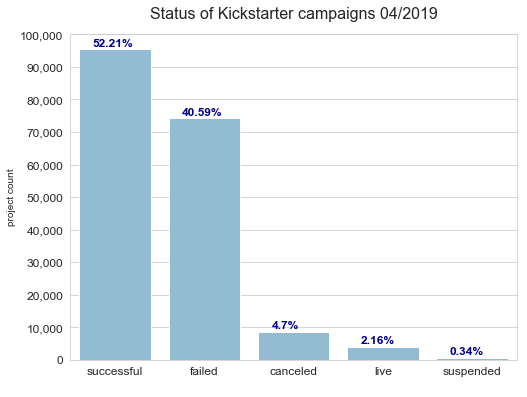

In [404]:
# style
plt.figure(figsize=[8,6])

# create ordering
order = master_df.status.value_counts().index

# plot bar chart for catergorical data
ax = sns.countplot(data=master_df, x='status', color=cust_blues, order=order);

# annotate proportions 
for p in ax.patches:
    ax.text(p.get_x()+0.15, 
            p.get_height()+1000, 
            str(round((p.get_height() / len(master_df))*100,2)) + '%', 
            fontsize=12, color='darkblue', weight='bold')

# labels and ticks
plt.title("Status of Kickstarter campaigns 04/2019", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.xlabel(" ")
y_ticks = np.arange(0, master_df.status.value_counts().values.max()+10000, 10000)
y_labels = [format_num(y_tick) for y_tick in y_ticks ]
plt.yticks(y_ticks, y_labels, fontsize=12)
plt.ylabel("project count")
plt.show()

Here we see that since the launch of Kickstarter in 2009, most campaigns ended in success (52.21%). 40.59% of all projects failed. There is also a small amount of projects that were canceled or suspended. Surprisingly, there is a relatively high number of nearly 4,000 projects currently live and open for funding. 

**How may projects succeeded or failed out of all completed projects?**

Below we are going to plot the success and failure counts of projects that were completed ordinarily.

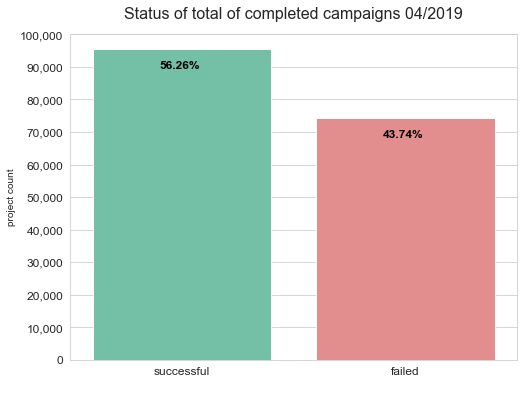

In [419]:
# settings
plt.figure(figsize=[8,6])

# plot bar plor of completed projects only
ax = sns.countplot(data=ks_compl, x='status', 
                   color=sns.set_palette(status_colors), 
                   order=ks_compl.status.value_counts().index);

# annotate proportion
for p in ax.patches:
    ax.text(p.get_x()+0.3, p.get_height()-6000, 
            str(round((p.get_height()/ len(ks_compl))*100,2)) + '%', 
            fontsize=12, color='black', weight='bold')

# labels and ticks
plt.title("Status of total of completed campaigns 04/2019", fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.xlabel(" ")
y_ticks = np.arange(0, ks_compl.status.value_counts().values.max()+10000, 10000)
y_labels = [format_num(y_tick) for y_tick in y_ticks ]
plt.yticks(y_ticks, y_labels, fontsize=12)
plt.ylabel("project count")
plt.show()

Of all completed projects by Kickstarter's 10th anniversary, the success rate even increased. There are {{format_num(n_compl_success)}} successfully funded projects in our data frame. More than half of all campaigns that were completed since Kickstarter's beginning were successful. Meanwhile, {{format_num(n_compl_fail)}} of all completed projects ended in failure.

### Categories and Subcategories

**What kind of categories, subcategories and combined categories are popular?**

I start the visualization of category by plotting the distribution of the main categories. 

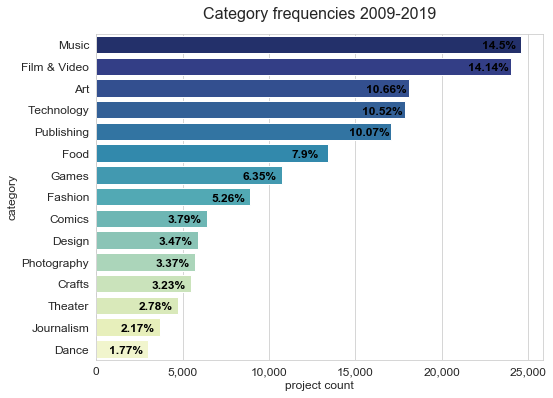

In [457]:
# settings
plt.figure(figsize=[8,6])

# plot horizontal bars of main categories
ax = sns.countplot(data=ks_compl, y='category', palette="YlGnBu_r", 
                   order=ks_compl.category.value_counts().index);

# annotate proportions
cat_counts = ks_compl.category.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count-1300, loc+0.2, cat_rate, ha='center', color="black", fontsize=12, fontweight='bold')
    
# labels and ticks
plt.title("Category frequencies 2009-2019", fontsize=16, pad=15);

plt.yticks(fontsize=12)
plt.ylabel("category", fontsize=12)

x_ticks = np.arange(0, ks_compl.category.value_counts().values.max()+5000, 5000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)
plt.xlabel("project count", fontsize=12)
plt.show()

Over the years, _Music_, _Film & Video_ and _Art_ have been the most dominant project categories in terms of their frequency. _Music_ and _Film & Video_ are relatively close together with 14.5%, respectively 14.14% of all completed projects. Art-related ventures followed with a share of at 10.6%.

Now, I depict the distribution of all subcategories by using the combined category values.

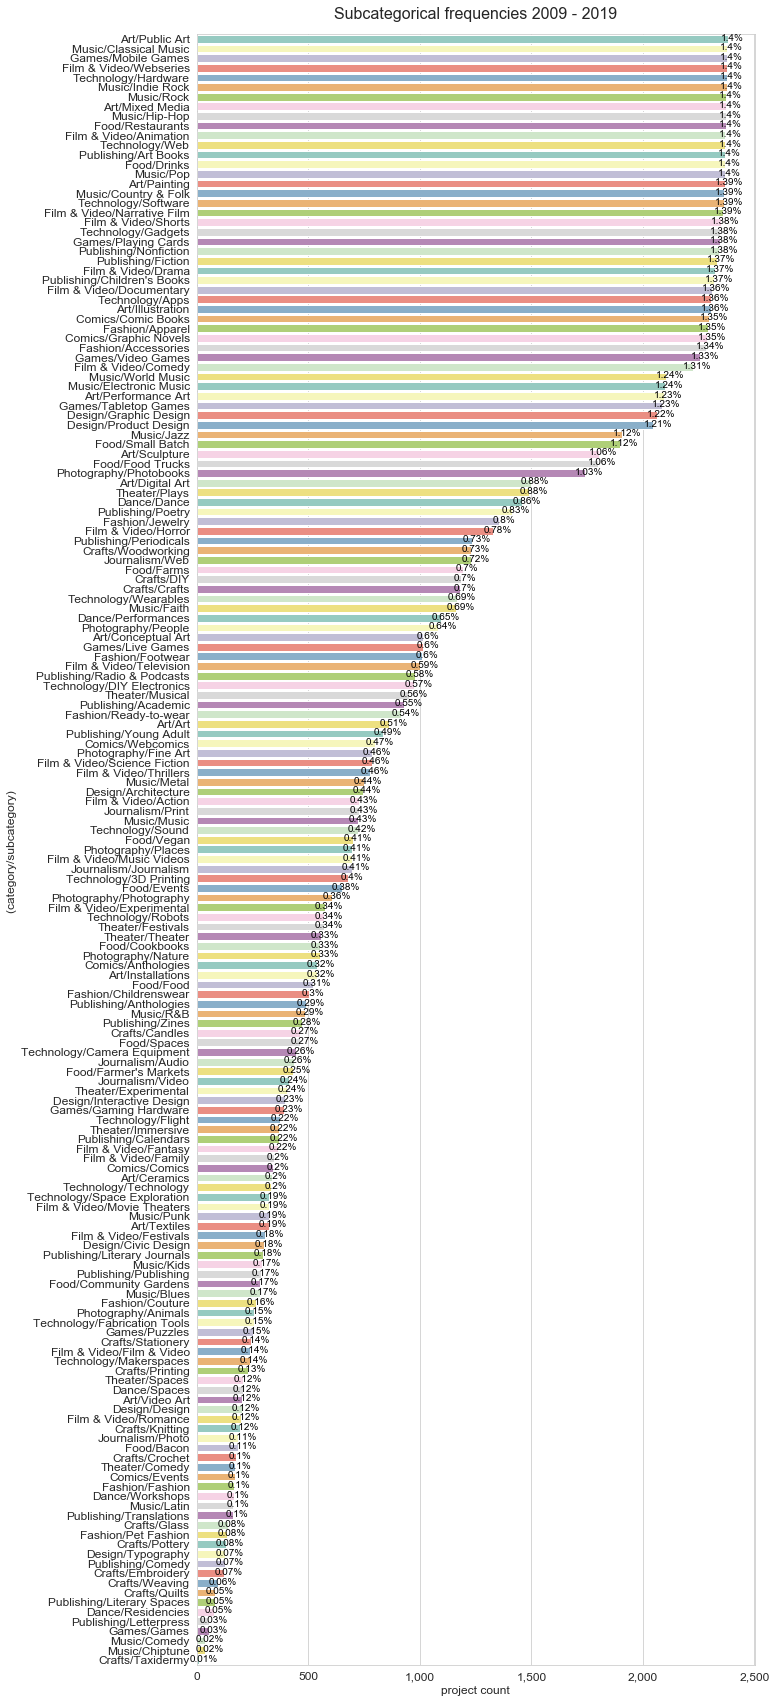

In [468]:
# settings
plt.figure(figsize=[10,30])

# plot horizontal bars of main categories
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="Set3",
                   order=ks_compl.comb_cat.value_counts().index);

# annotate proportions
cat_counts = ks_compl.comb_cat.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+20, loc+0.15, cat_rate, ha='center', color="black")
    
    
# labels and ticks
plt.title("Subcategorical frequencies 2009 - 2019", fontsize=16, pad=15);

plt.yticks(fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)

x_ticks = np.arange(0, ks_compl.comb_cat.value_counts().values.max()+500, 500)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)
plt.xlabel("project count", fontsize=12)
plt.show()    

The plot above shows the frequency of all combined categories. The distribution shows the most common subcategories are _Art/Public Art, _Music/Classical Music_ and _Games/Mobile Games_ with a proportion 1.4% each. Uncommon projects are _Music/Comedy_, _Music/Chiptune_ and _Crafts/Taxidermy_. Notice that the relative distribution of subcategories is relatively even. About one third of all subcategories range  between relative shares of 1.4% to 1% of all projects. There are extremely dominant subcategories.

Since there are so many, I'm going to plot only the most common and uncommon subcategories.

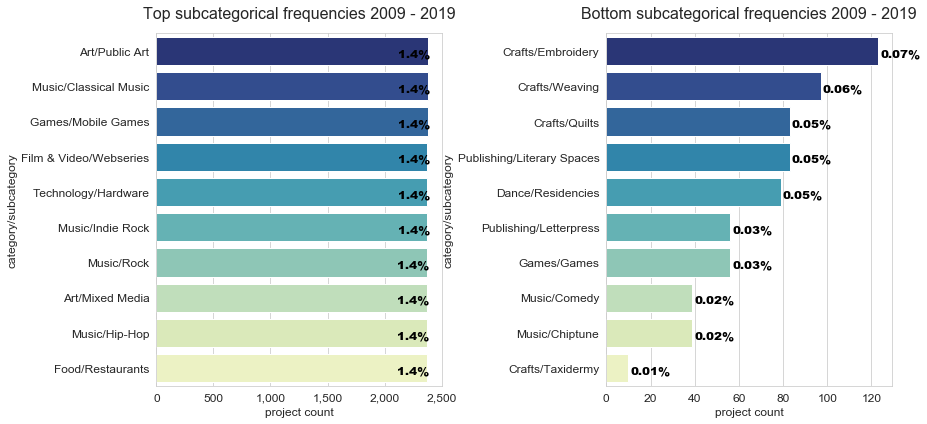

In [500]:
# save 10 most popular combined categories
pop_subcats = ks_compl.comb_cat.value_counts().index[:10]

# save 10 most uncommon combined categories
unpop_subcats = ks_compl.comb_cat.value_counts().index[-10:]

# settings
plt.figure(figsize=[13,6])

# left plot: top subcategorical count as horizontal bars
plt.subplot(1,2,1)
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="YlGnBu_r",
                   order=pop_subcats);

# annotate proportions
cat_counts = ks_compl.comb_cat.value_counts()
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count-120, loc+0.15, cat_rate, ha='center', color="black", fontsize=12, fontweight='black')

# labels and ticks
plt.yticks(fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
plt.title("Top subcategorical frequencies 2009 - 2019", fontsize=16, pad=15); 
x_ticks = np.arange(0, ks_compl.comb_cat.value_counts().values.max()+500, 500)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)
plt.xlabel("project count", fontsize=12)


# right plot: top subcategorical count as horizontal bars
plt.subplot(1,2,2)
ax = sns.countplot(data=ks_compl, y='comb_cat', palette="YlGnBu_r",
                   order=unpop_subcats);
plt.title("Bottom subcategorical frequencies 2009 - 2019", fontsize=16, pad=15);


# annotate proportions
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    count = int(cat_counts[label.get_text()])
    cat_rate = str(round(count*100 / n_compl_projects, 2)) + "%"
    plt.text(count+10, loc+0.15, cat_rate, ha='center', color="black", fontsize=12, fontweight='black')
      
# labels and ticks
plt.tight_layout()
plt.yticks(fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
x_ticks = np.arange(0, 130, 20)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)
plt.xlabel("project count", fontsize=12)
plt.show()    

While the above plots show the top frequencies, I'm interested there are any dominant subcategories within a category.  

#### Subplots for subcategories of most popular categories
Let's look at the 6 most common categories in depth. Below, I investigate the inner categorical distribution of the 6 most common categories in dept.

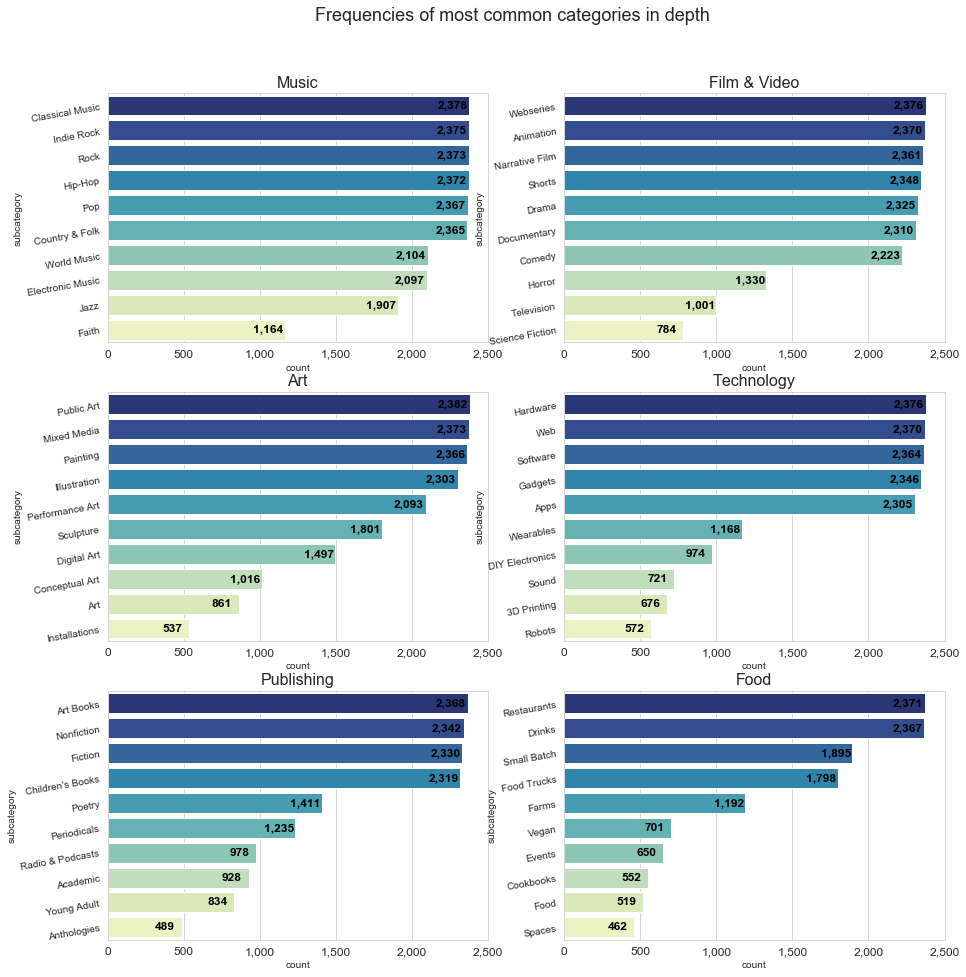

In [513]:
# settings
plt.figure(figsize=[15,12])


# subplots
for i, cat in enumerate(pop_cat[:6]):
        # filter dataframe by category
        ks_compl_cat = ks_compl.query('category == @cat')
        plt.subplot(3, 2, i+1)
        # plot horizontal bars
        ax = sns.countplot(data=ks_compl_cat, y='subcategory', palette='YlGnBu_r',  
                           order=ks_compl_cat.subcategory.value_counts()[:10].index);
        plt.yticks(rotation=10)
        plt.subplots_adjust(bottom=-0.1)
        x_ticks = np.arange(0, ks_compl_cat.subcategory.value_counts().max()+500, 500)
        x_labels = [format_num(x_tick) for x_tick in x_ticks]
        plt.xticks(x_ticks, x_labels, fontsize=12)
        
        # annotate
        cat_counts = ks_compl_cat.subcategory.value_counts()
        plt.title(f"{cat}", fontsize=16)
        locs, labels = plt.yticks()
        for loc, label in zip(locs, labels):
            count = cat_counts[label.get_text()]
            plt.text(count-110, loc+0.1, format_num(count), ha='center', 
                     color="black", fontsize=12, fontweight='bold')
plt.suptitle("Frequencies of most common categories in depth", fontsize=18)
plt.show()

According to the project categories, we clearly recognize the creative focus of Kickstarter. With the exception of tech projects, Food/Restaurants and Food/Drinks, we mostly find projects with typically lower commercial potential. 

## Featured
**How did Kickstarter support campaigns?**  

Next step is to investigate how Kickstarter supports projects. We start by plotting the value counts of featured.

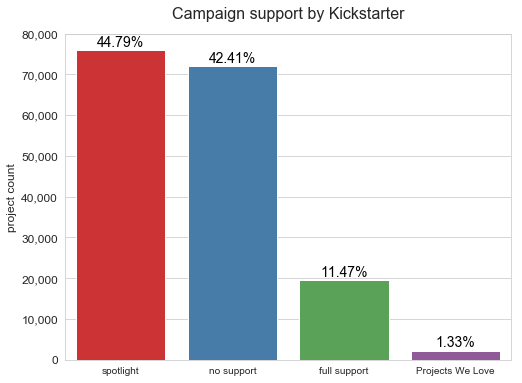

In [537]:
# settings
plt.figure(figsize=[8,6])

# order
feat_order = ks_compl.featured.value_counts().index

# plot vertical bars
ax = sns.countplot(data=ks_compl, x='featured', color=sns.set_palette(feat_color),
                   order=feat_order)

# annotate percentages
for i, feat in enumerate(feat_order):
    rate = (ks_compl.featured.value_counts().values[i] / n_compl_projects) * 100
    plt.text(i, ks_compl.featured.value_counts().values[i]+1000, str(round(rate, 2)) + "%", 
             ha='center', fontsize=14, color="black")

# ticks and labels
plt.xlabel("", fontsize=12)
locs, labels = plt.yticks()
labels = [str(format_num(loc)) for loc in locs]
plt.yticks(locs, labels, fontsize=12)
plt.ylabel("project count", fontsize=12)
plt.title("Campaign support by Kickstarter", fontsize=16, pad=15);
plt.show();

44.8% of all projects were spotlighted by Kickstarter on their landing page. Nearly the same amount of projects were not supported by Kickstarter. On the other hand, {{ks_compl.featured.value_counts().values[2]}} projects got full support. To be precise, 11.47% of all completed projects were featured on the landing page and got picked by staff for a Projects We Love badge. Only a very small amount of project were awarded the badge, but didn't get any further support. 

### Duration
I expect the funding duration to influence on success and failure of project. Thus, I visually assess duration next.

**How is funding duration distributed across projects?**

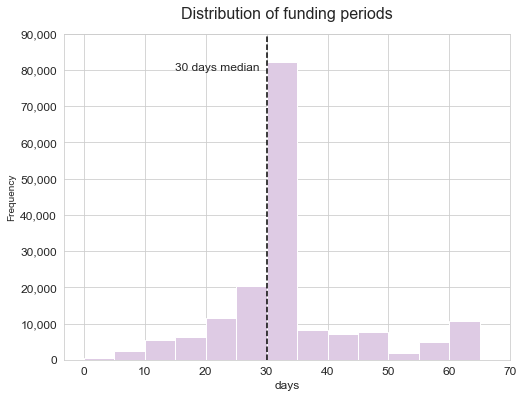

In [565]:
# settings
plt.figure(figsize=[8,6])

# plot histogram of project duration
(ks_compl['duration'].astype('timedelta64[h]') / 24).plot.hist(color=cust_purple, bins=np.arange(0, 70,5))

# annotate median duration
plt.axvline(ks_compl['duration'].dt.days.median(), color='black', linestyle='--')

# labels and titles
plt.title("Distribution of funding periods", fontsize=16, pad=15 );
plt.text(15, 80000, str(ks_compl['duration'].dt.days.median())[:-2] + " days median", fontsize=12)

ylocs, xlabels = plt.yticks()
ylabels = [str(format_num(yloc)) for yloc in ylocs]
plt.yticks(ylocs, ylabels, fontsize=12)

x_ticks = np.arange(0, 80, 10)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=12)

plt.xlabel("days", fontsize=12)
plt.show()

The above normally distributed plot of funding periods shows that durations around a median of 30 days strongly dominate. There is second modal peak in durations between 60-65 days.

## Goals

I assume that goals are one of the main predictors on whether a projects succeeds or fails. From the above statistical assessment, I expect my visuals to be extremely skewed to the right. Aside from using the 95 percentile data frame, I will use log scales and I will group the data in multiple goal levels. 

**How are goals distributed across completed campaigns?**

In [596]:
ks_compl.goal_hist_usd.describe()

count   169,661.0           
mean    40,906.12771538828  
std     1,106,030.4164593664
min     0.01                
25%     1,500.0             
50%     5,000.0             
75%     13,193.87635772584  
max     150,099,318.94817606
Name: goal_hist_usd, dtype: float64

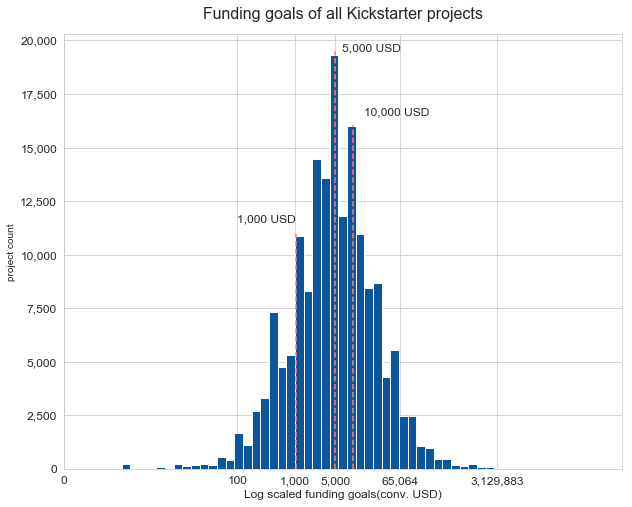

In [598]:
# settings
plt.figure(figsize=[10,8])
base_color = sns.color_palette("Blues_r")[0]

# create log scale and bin data 
log_data = np.log10(ks_compl.goal_hist_usd)
log_bin_edges = np.arange(0, log_data.max()+0.15, 0.15)

# plot histogram using binned log data 
plt.hist(log_data, bins = log_bin_edges, color=base_color);

# annotations

# calculate peaks
peaks = ks_compl.goal_hist_usd.value_counts().index[:3]
log_peaks = [np.log10(peak) for peak in peaks]
texts = [format_num(peak) + " USD" for peak in peaks]
ax = plt.gca()

# 5000 peak
ax.axvline(x=log_peaks[0], color='salmon', ymax=0.96, linestyle="dashed")
ax.annotate(texts[0], xy=(log_peaks[0]+0.11, 19500),fontsize=12)

# 10 000 peak
ax.axvline(x=log_peaks[1], color='salmon', ymax=0.79, linestyle="dashed")
ax.annotate(texts[1], xy=(log_peaks[0]+0.5, 16500),fontsize=12)

# 1000 peak
ax.axvline(x=log_peaks[2]+0.01999, color='salmon', ymax=0.539, linestyle="dashed")
ax.annotate(texts[2], xy=(log_peaks[2]-1, 11500),fontsize=12)

# labels and ticks
plt.title("Funding goals of all Kickstarter projects", fontsize=16, pad=15)

y_ticks = np.arange(0, 20000+2500, 2500)
y_labels = [format_num(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels, fontsize=12)
plt.ylabel("project count")

x_ticks = [0.1, 100, 1000, goal_50, round(goal_95,2), round(goal_extreme,2)]
x_tick_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(np.log10(x_ticks), x_tick_labels, fontsize=12)
plt.xlabel('Log scaled funding goals(conv. USD)', fontsize=12)

plt.show()

Above we find our funding goal normally distributed with multimodal peaks: the highest peak is the median of USD 5,000, The second highest peak is at USD 10,000.

However, by using a log scale, the above visualization hides the extremely skewed nature of funding goals. To depict the true nature of goals, I'm going to split goals into different levels and visualize the distribution level by level.

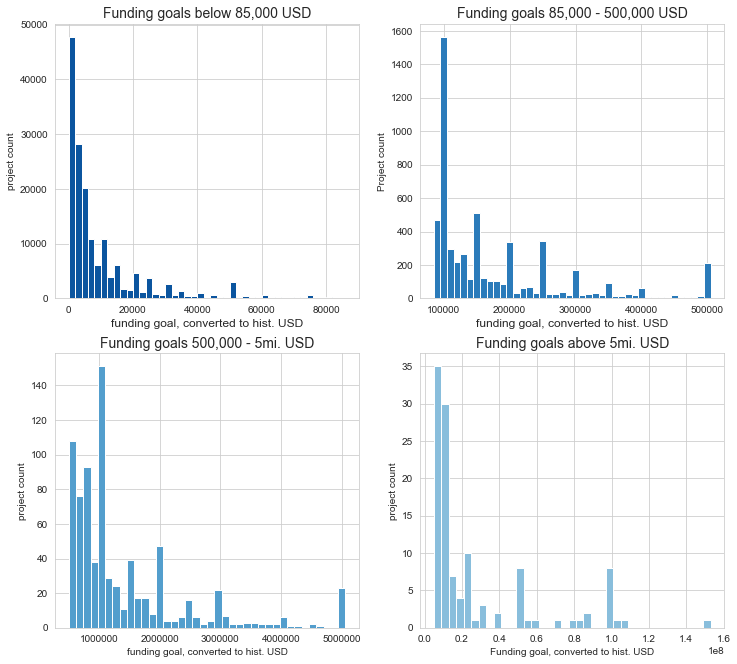

In [612]:
# style
plt.figure(figsize=[12,12])
base_color = sns.color_palette("Blues_r")

plt.subplot(3, 2, 1)
ks_compl_goal = ks_compl[ks_compl.goal_hist_usd < 85000]
bin_edges = np.arange(0, ks_compl_goal.goal_hist_usd.max()+2000, 2000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[0])
plt.title("Funding goals below 85,000 USD",fontsize=14)
plt.xlabel("funding goal, converted to hist. USD", fontsize=12)
plt.ylabel("project count")
plt.subplots_adjust(bottom=-0.2)

plt.subplot(3, 2, 2)
ks_compl_goal = ks_compl.query('(goal_hist_usd >= 85000) & (goal_hist_usd < 500001)')
bin_edges = np.arange(85000, 500001+10000, 10000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[1])
plt.title("Funding goals 85,000 - 500,000 USD", fontsize=14)
plt.xlabel("funding goal, converted to hist. USD", fontsize=12)
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.2)

plt.subplot(3, 2, 3)
ks_compl_goal = ks_compl.query('(goal_hist_usd >= 500001) & (goal_hist_usd < 5000001)')
bin_edges = np.arange(500001, 5000000+120000, 120000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[2])
plt.title("Funding goals 500,000 - 5mi. USD", fontsize=14)
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("project count")

plt.subplot(3, 2, 4)
ks_compl_goal = ks_compl[ks_compl.goal_hist_usd >= 5000001]
bin_edges = np.arange(5000001, ks_compl.goal_hist_usd.max()+4000000, 4000000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[3])
plt.title("Funding goals above 5mi. USD", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("project count")
plt.subplots_adjust(bottom=-0.2)

plt.show()

In the above plots, I played with different goal groups to find the clearest solution to show the right-skewed distribution and the multi-modal character of funding goals. To bring the analysis to the next level, I'm going to split goals into homogeneous groups based on their quartiles.

In [613]:
# Bin observations into ordinal goal categories
bin_edges = [goal_min, goal_25, goal_50, goal_75, goal_95, goal_extreme, goal_outliers, goal_max]
bin_names = ['low', 'medium', 'moderately high', 'high', 'very high', 'extreme', 'outliers']

# Creates goal_level column 
pd.set_option('mode.chained_assignment', None)
ks_compl['goal_level'] = pd.cut(ks_compl['goal_hist_usd'], bin_edges, labels=bin_names)
ks_compl.goal_level.value_counts()

medium             48853
low                43541
moderately high    34852
high               33931
very high          8313 
extreme            153  
outliers           17   
Name: goal_level, dtype: int64

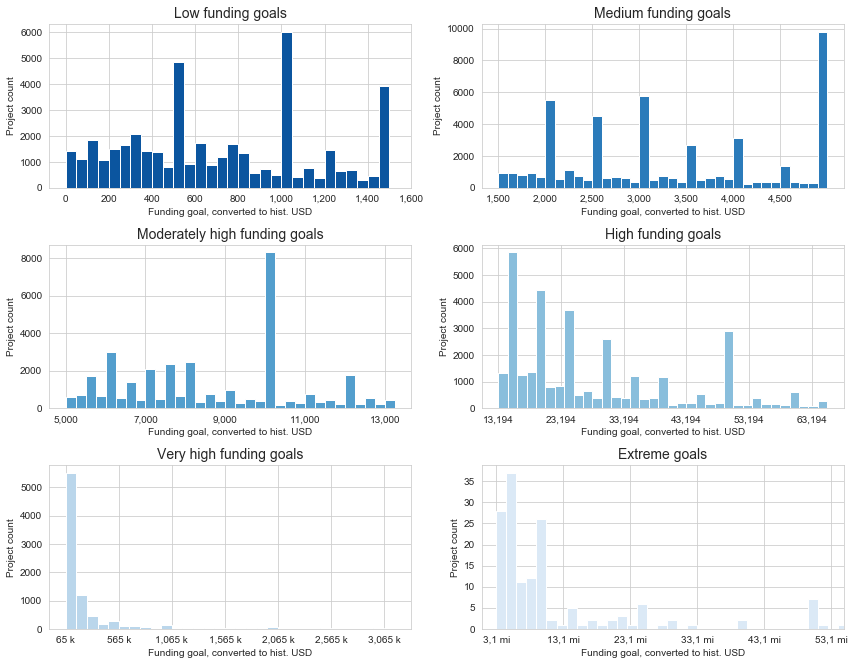

In [636]:
# style
plt.figure(figsize=[12,12])
base_color = sns.color_palette("Blues_r")

# # low goal projects
plt.subplot(4, 2, 1)
ks_compl_goal_low = ks_compl[ks_compl.goal_level == "low"]
bin_edges_leveled = np.arange(0, ks_compl_goal_low.goal_hist_usd.max()+50, 50)
plt.hist(data = ks_compl_goal_low, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[0])
plt.title("Low funding goals", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
x_ticks = np.arange(0, goal_25+200, 200)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.3)

# medium goal projects
plt.subplot(4, 2, 2)
ks_compl_goal_medium = ks_compl[ks_compl.goal_level == "medium"]
bin_edges_leveled = np.arange(goal_25, ks_compl_goal_medium.goal_hist_usd.max()+100, 100)
plt.hist(data = ks_compl_goal_medium, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[1])
plt.title("Medium funding goals", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
x_ticks = np.arange(goal_25, goal_50, 500)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.3)

# moderately high goal projects
plt.subplot(4, 2, 3)
ks_compl_goal_moderate = ks_compl[ks_compl.goal_level == "moderately high"]
bin_edges_leveled = np.arange(goal_50, ks_compl_goal_moderate.goal_hist_usd.max()+250, 250)
plt.hist(data = ks_compl_goal_moderate, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[2])
plt.title("Moderately high funding goals", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
x_ticks = np.arange(goal_50, goal_75, 2000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.5)

# high goal projects
plt.subplot(4, 2, 4)
ks_compl_goal_high = ks_compl[ks_compl.goal_level == "high"]
bin_edges_leveled = np.arange(goal_75, ks_compl_goal_high.goal_hist_usd.max()+1500, 1500)
plt.hist(data = ks_compl_goal_high, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[3])
plt.title("High funding goals", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
x_ticks = np.arange(goal_75, goal_95, 10000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.5)

# # very high goal projects
plt.subplot(4, 2, 5)
ks_compl_goal_very_high = ks_compl[ks_compl.goal_level == "very high"]
bin_edges_leveled = np.arange(goal_95, ks_compl_goal_very_high.goal_hist_usd.max()+100000, 100000)
plt.hist(data = ks_compl_goal_very_high, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[4])
plt.title("Very high funding goals", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
x_ticks = np.arange(goal_95, goal_extreme, 500000)
x_labels = [format_num(x_tick)[:-4] + " k" for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.subplots_adjust(bottom=-0.5)

# extreme goal projects
plt.subplot(4, 2, 6)
ks_compl_goal_extreme = ks_compl[ks_compl.goal_level == "extreme"]
bin_edges_leveled = np.arange(goal_extreme, ks_compl_goal_extreme.goal_hist_usd.max()+1500000, 1500000)
plt.hist(data = ks_compl_goal_extreme, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[5])
plt.title("Extreme goals", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.5)
x_ticks = np.arange(goal_extreme, goal_outliers, 10000000)
x_labels = [format_num(x_tick)[:-6] + " mi" for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels)
plt.xlim(1000000, 55000000) # treat values above 55,000,000 like outliers

plt.tight_layout()
plt.show()

Here, goals were plotted leveled by their quartiles to guide the attention towards its multi-modal peaks. We experience strong outliers at the upper end of funding goals. Due to the very strong right tail and to improve readability of the above graphs, I limited the graphs to goals under USD 55 mi. We usually find full numbers goal, like 500, 1,000, 5,000, 1,000 and 50,000 etc. Below I will programmatically calculate the most important modes by category.  

In [619]:
# find local peaks
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

for name, df in zip(bin_names, ks_goal_leveled):
    frequencies = df.goal_hist_usd.value_counts().index[:5]
    freq_counts = df.goal_hist_usd.value_counts().values[:5]
    print(f"\nFrequency peaks of {name} goal projects:")
    for i in range(5): print(f"USD {format_num(frequencies[i])}, count: {format_num(freq_counts[i])}")



Frequency peaks of low goal projects:
USD 1,000, count: 5,735
USD 500, count: 4,275
USD 1,500, count: 3,592
USD 300, count: 1,288
USD 1,200, count: 1,134

Frequency peaks of medium goal projects:
USD 5,000, count: 9,534
USD 3,000, count: 5,338
USD 2,000, count: 5,112
USD 2,500, count: 4,062
USD 4,000, count: 2,854

Frequency peaks of moderately high goal projects:
USD 10,000, count: 8,080
USD 6,000, count: 2,508
USD 8,000, count: 2,093
USD 7,000, count: 1,628
USD 7,500, count: 1,621

Frequency peaks of high goal projects:
USD 15,000, count: 4,426
USD 20,000, count: 3,826
USD 25,000, count: 3,165
USD 50,000, count: 2,782
USD 30,000, count: 2,301

Frequency peaks of very high goal projects:
USD 100,000, count: 1,266
USD 75,000, count: 585
USD 150,000, count: 410
USD 250,000, count: 319
USD 200,000, count: 277

Frequency peaks of extreme goal projects:
USD 10,000,000, count: 25
USD 5,000,000, count: 22
USD 50,000,000, count: 6
USD 25,000,000, count: 5
USD 4,000,000, count: 5


The funding goal distribution is heavily skewed to the right with multi modal peaks. We experience string outliers at the high end of funding goals. Due to the very strong right tail and to improve readability of the above graphs, I limited the graphs to goals under 55mi. Let's find out what the most successful projects were.



**Backers**

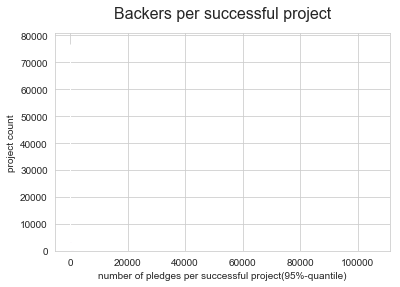

In [640]:
bin_edges = np.arange(0, ks_compl['backers_count'].max()+20, 20)
plt.hist(data = ks_compl, x = 'backers_count', bins= bin_edges, color=pledged_color);
plt.ylabel("Average monthly success rates(%)");
plt.title("Backers per successful project", fontsize=16, pad=15)
plt.xlabel("number of pledges per successful project(95%-quantile)")
plt.ylabel("project count");

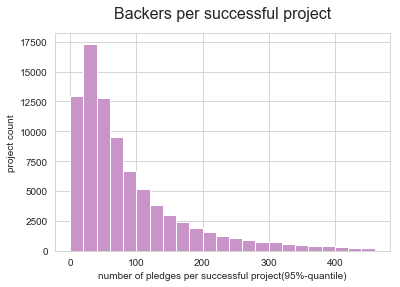

In [637]:
bin_edges = np.arange(0, ks_compl_95['backers_count'].max()+20, 20)
plt.hist(data = ks_success_95, x = 'backers_count', bins= bin_edges, color=pledged_color);
plt.ylabel("Average monthly success rates(%)");
plt.title("Backers per successful project", fontsize=16, pad=15)
plt.xlabel("number of pledges per successful project(95%-quantile)")
plt.ylabel("project count");

**Categories over time**

In [ ]:
# setting
fig = plt.figure(figsize=[12,10])
category_colors = ['#a6cee3','#e5c494', '#1f78b4', '#33a02c', '#fb9a99', '#b3b3b3', '#e31a1c','#fdbf6f', 
                   '#ff7f00', '#cab2d6', '#6a3d9a', '#b2df8a', '#984ea3', '#ffd92f', '#b15928']

# calculate monthly mean goals of successfully finished projects
j = 0
g_count = 0
# create 5 suplots
for i in range(1,6):
    plt.subplot(3, 3, i)
    # create a data frames each grouped by category, plot 3 lines per 
    for cat in ks_compl.category.value_counts()[j:j+3].index:
        ks_compl_cat = ks_compl[ks_compl.category == cat]
        ks_compl_cat = ks_compl_cat.project_id.groupby([ks_compl_cat.deadline.dt.year]).count().reset_index(name="cat_count")
        # create an additional column to calculate relative number o projects per year
        ks_compl_cat['rate'] = 0
        for year in ks_compl_cat.deadline.values:
            rate = ks_compl_cat['cat_count'] / ks_year_count[ks_year_count.deadline == year]['count_year'].values[0]
            ks_compl_cat['rate'] =  round(rate*100, 2)
        # plot
        ks_compl_cat.rate.plot(color=category_colors[g_count], label=cat);
        # labels and ticks
        g_count+=1
        plt.tight_layout()
        plt.yticks(np.arange(0, 80+1, 10))
        plt.xticks(np.arange(0, 11, 2), np.arange(2009, 2020,2))
        plt.xlim(1,9) # since 2009 and 2019 don't have full yearly data available, limit plot 
        plt.xlabel("")
        plt.ylabel("proportion of yearly projects (%)")
        plt.legend()
    j+=3

plt.suptitle("Relative popularity of categories 2010-2018", fontsize=18, y=1.02)
plt.show()

kickstarter projects have an extremely wide spread of project funding goals. They range between 0 to 150,000,000 USD (converted to hist. USD) with a standard deviation of more than 1.1 mi USD. The below 5 number summary describes the distribution of project goals.

ks_compl.goal_hist_usd.describe()
executed in 14.9s, finished 10:40:53 2019-06-24
25% percent of the projects fall below a funding goal of USD 1,500. The funding median is at USD 5,000 and the third quartile marks at USD 13,194. Interestingly, the 4th quartile shows an extremely high quartile range: 150,099,300-13,194=150,086,106. Our data is heavily skewed to the right and we observe extreme outliers with funding goals of several millions.

In order to display how project goals are being chosen, I split projects into 4 groups. Due to the extremes, the quartiles are not ideal to display the distribution of project goals. Below I'm experimenting with goal ranges to get at understanding of the project goal distribution.

### Goals

The goals of kickstarter projects have an extremely wide spread of project funding goals. They range between 0 to 150,000,000 USD (converted to hist. USD) with a standard deviation of more than 1.1 mi USD. The below 5 number summary describes the distribution of project goals.

In [615]:
ks_compl[ks_compl.goal_level == "outliers"]['status'].value_counts()

failed        17
successful    0 
Name: status, dtype: int64

In [616]:
ks_compl[ks_compl.goal_level == "extreme"]['status'].value_counts()

failed        153
successful    0  
Name: status, dtype: int64

In [ ]:
ks_compl.goal_hist_usd.describe()

25% percent of the projects fall below a funding goal of USD 1,500. The funding median is at USD 5,000 and the third quartile marks at USD 13,194. Interestingly, the 4th quartile shows an extremely high quartile range:  150,099,300-13,194=150,086,106. Our data is heavily skewed to the right and we observe extreme outliers with funding goals of several millions.

In order to display how project goals are being chosen, I split projects into 4 groups. Due to the extremes, the quartiles are not ideal to display the distribution of project goals. Below I'm experimenting with goal ranges to get at understanding of the project goal distribution.  

Plot log scale.

In [ ]:
# style
plt.figure(figsize=[12,12])
base_color = sns.color_palette("Blues_r")

plt.subplot(3, 2, 1)
ks_compl_goal = ks_compl[ks_compl.goal_hist_usd < 85000]
bin_edges = np.arange(0, ks_compl_goal.goal_hist_usd.max()+2000, 2000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[0])
plt.title("Funding goals below 85,000 USD")
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("project count")
plt.subplots_adjust(bottom=-0.2)

plt.subplot(3, 2, 2)
ks_compl_goal = ks_compl.query('(goal_hist_usd >= 85000) & (goal_hist_usd < 500001)')
bin_edges = np.arange(85000, 500001+10000, 10000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[1])
plt.title("Funding goals 85,000 to 500,000 USD")
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.2)

plt.subplot(3, 2, 3)
ks_compl_goal = ks_compl.query('(goal_hist_usd >= 500001) & (goal_hist_usd < 5000001)')
bin_edges = np.arange(500001, 5000000+120000, 120000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[2])
plt.title("Funding goals 500,000 to 5mi. USD")
plt.xlabel("funding goal, converted to hist. USD")
plt.ylabel("project count")

plt.subplot(3, 2, 4)
ks_compl_goal = ks_compl[ks_compl.goal_hist_usd >= 5000001]
bin_edges = np.arange(5000001, ks_compl.goal_hist_usd.max()+4000000, 4000000)
plt.hist(data = ks_compl_goal, x = 'goal_hist_usd', bins = bin_edges, color=base_color[3])
plt.title("Funding goals above 5mi. USD")
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.subplots_adjust(bottom=-0.2)

plt.show()

There were no fundings successful for projects in of the extreme/outlier goal category.Let's narrow it down and identify goal of the most successful project. 

In [ ]:
# most successful projects
ks_compl_goal_very_high[ks_compl_goal_very_high.status == "successful"].sort_values(by=['goal_hist_usd'], ascending=False)[:5]


The 4 most successful projects had a funding goal of 2mi. The video game 'Shenmue 3" raised 6.33mi USD and therefore is the most successful project in the Kickstarter history. https://www.kickstarter.com/projects/ysnet/shenmue-3

Nevertheless, if we plot goals below 65,000 we're able to depict the overall trend towards higher project goals. Projects with lower goals are by far more common than higher goal projects.     

In [ ]:
# # style
plt.figure(figsize=[8,8])

# # low goal projects
ks_compl_goal_95 = ks_compl[ks_compl.goal_hist_usd < goal_95]
bin_edges_leveled = np.arange(0, ks_compl_goal_95.goal_hist_usd.max()+1000, 1000)
plt.hist(data = ks_compl_goal_95, x = 'goal_hist_usd', bins = bin_edges_leveled, color=base_color[0]);
plt.title("Low to high funding goals (below USD ~65,000)", fontsize=14)
plt.xlabel("Funding goal, converted to hist. USD")
plt.ylabel("Project count")
plt.show()

Above, we linearly plot normally distributed data with a strong right skew, we'd would receive a wide bin on the left, the bins would get thinner to the right. It makes sense use a log scale to get a better impression of our data. However, the strong multimodal peaks caught my interest. Let's identify local peaks below.

When we use a log scale, we actually find a normal distribution of project goals.

**How did goals develop over time?**

In [ ]:
plt.figure(figsize=[10,6])

# remove goal outliers
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]

# calculate monthly mean goals of successfully finished projects
goals_grouped = ks_compl_success_95.groupby([ks_compl_success_95.deadline.dt.year, ks_compl_success_95.deadline.dt.month]).mean()[['goal_hist_usd']]

#line plot
ax = goals_grouped.goal_hist_usd.plot();

# labels
plt.xlabel("")
plt.ylabel("goals(conv. USD)")
plt.title("Funding goals of successful projects over time", fontsize=14, pad=15)

plt.show()

In [ ]:
# regression approach
plt.figure(figsize=[10,6])

# we got 120 months, so we chuck our x axis into 120 ticks
goals_grouped['date'] = np.arange(0, len(goals_grouped), 1)

# scatterplot our monthly means and fit a polynomial regression of 2nd degree
ax = sns.regplot(x=goals_grouped['date'], y=goals_grouped['goal_hist_usd'], 
                 color=cust_green,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True);

# create date tick labels
x_labels = np.arange('2009-05', '2019-05', 7, dtype='datetime64[M]')
x_ticks = np.arange(0,len(goals_grouped), 7)
plt.xticks(x_ticks,x_labels, rotation=45, ha='right')
plt.xlabel("")
plt.ylabel("avg. monthly goals(conv. USD)")
plt.title("Funding goals of successful projects over time", fontsize=14, pad=15)

plt.show()

In [ ]:
# a line plot approach with error lines
plt.figure(figsize=[10,6])

# group by year and calculate mean and sd of funding goals
goals_grouped_year = ks_compl_success_95['goal_hist_usd'].groupby([ks_compl_success_95.deadline.dt.year]).mean()
goals_grouped_year_sd = ks_compl_success_95['goal_hist_usd'].groupby([ks_compl_success_95.deadline.dt.year]).std().fillna(0)

# Create a dataframe
goals_grouped_year = goals_grouped_year.reset_index(drop=True)
goals_grouped_year_sd = goals_grouped_year_sd.reset_index(drop=True)
goals_yearly = pd.DataFrame({'goal_mean': goals_grouped_year, 'goal_sd':goals_grouped_year_sd})

# plot
plt.errorbar(x = np.arange(2009,2020, 1), y = goals_yearly['goal_mean'], yerr = goals_yearly['goal_sd'])

# labels
plt.ylabel("avg yearly goals(conv. USD)")
plt.title("Yearly funding goals of successful projects over time", fontsize=14, pad=15)
plt.show()

Funding goals seem to have peaked in late 2015 to mid 2016. Ever since, funding goals have regressed slightly.

# Bivariate explorations

In [ ]:
# find out what project categories are success predictors
plt.figure(figsize=[15,9])
cust_color = ["#f08080", "#66cdaa"]
# clustered bar chart qualitative vs qualitative

# seaborn countplot
ax = sns.countplot(data = ks_compl, x = 'category', hue = 'status', color = sns.set_palette(cust_color), order=ks_compl.category.value_counts().index[:-2])

# reset legend to avoid overlap
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'status')

# annotate
plt.title("How successful were projects by category?", fontsize=16);
plt.legend(("failed", "successful"))
plt.show()

As we visualize absolute values above, we may misinterpret the actual success rates. In the graph below, we calculate relative frequencies for each category.  

In [ ]:
pop_cats = ks_compl.category.value_counts().index
cat_counts = ks_compl.category.value_counts()

# calculate success and failure rates
def calc_rate(category, status):
    cat_df = ks_compl[ks_compl.category == category]
    cat_len = len(cat_df)
    cat_status_len = len(cat_df[cat_df.status == status])
    return (cat_status_len / cat_len) * 100 

cat_success = [calc_rate(cat,"successful") for cat in pop_cats]
cat_failed = [calc_rate(cat,"failed") for cat in pop_cats]

# create a new dataframe based success and failure rates
df = pd.DataFrame({'failed': cat_failed, 'success': cat_success,}, index=pop_cats)

# order by success rates
df.sort_values(by=['success'], ascending=False, inplace=True)

# plot
ax = df.plot.bar(rot=30, figsize=(10,8));

# plot means
plt.axhline(p_compl_success*100, color='g')
plt.axhline(p_compl_fail*100, color='r')

# annotate
plt.title("Success and failure rates by category", fontsize=16);
plt.text(14.7, p_compl_success*100+1, "avg. success")
plt.text(14.7, p_compl_fail*100+1, "avg. failure")
plt.ylabel("rate(%)")
plt.xlabel("category")
plt.show()

violin plot for project status (categorical )vs. goal (quantitative). I may try a faceted approach for our different categories.

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
# plot

df = ks_compl[ks_compl.goal_hist_usd < goal_95]
ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
                    order=['successful', 'failed'], color = color, 
                    inner='quartile')
#annotate
plt.title("Project goals below 95 quartile", fontsize=14 )
plt.ylabel('Funding goals(conv. USD)')
plt.subplots_adjust(bottom=-0.3)
plt.show()

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])

# ks_compl_goal_extreme = ks_compl_goal_extreme
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high, 
                   ks_compl_goal_extreme]

# low goal projects
texts = ["Low", "Medium", "Moderately high", "High", "Very High", "Extreme"]
for i, df in enumerate(ks_goal_leveled):
    # plot
    plt.subplot(3, 2, i+1)
    ax = sns.violinplot(data = df, x = 'status', y = 'goal_hist_usd', 
               order=['successful', 'failed'], color = color, inner='quartile')
    # calculate success rates
    p_failed_goal = len(df[df.status == "failed"])* 100 / len(df)
    p_success_goal = 100 - p_failed_goal
    
    #annotate
    ax.annotate(str(round(p_failed_goal,2)) + "%", xy=(1.19, df.goal_hist_usd.max()*1.04), fontsize=12)
    ax.annotate(str(round(p_success_goal,2)) + "%", xy=(-0.47, df.goal_hist_usd.max()*1.04), fontsize=12)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.ylabel('Funding goals(conv. USD)')
    plt.subplots_adjust(bottom=-0.3)
plt.show()

In [ ]:
plt.figure(figsize=[15,7])

ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_fail = ks_compl[ks_compl.status == "failed"]
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95]
ks_compl_fail_95 = ks_compl_fail[ks_compl_fail.goal_hist_usd < goal_95]

plt.subplot(1, 2, 1)
sns.regplot(ks_compl_success_95.goal_hist_usd, ks_compl_success_95.pledged_hist_usd, 
            scatter_kws = {'alpha' : 1/5}, fit_reg=False);
plt.ylim(0, 500000)
plt.title("Successful projects goal vs. pledged", fontsize=14)
plt.ylabel("Amount pledged (conv. USD)")
plt.xlabel("Project goal (conv. USD)")


plt.subplot(1, 2, 2)
sns.regplot(ks_compl_fail_95.goal_hist_usd, ks_compl_fail_95.pledged_hist_usd, 
            scatter_kws = {'alpha' : 1/5}, color="#f08080", fit_reg=False);
plt.title("Failed projects goal vs. pledged", fontsize=14)
plt.ylabel("Amount pledged (conv. USD)")
plt.xlabel("Project goal (conv. USD)")

plt.show()


In [ ]:
# calculate differences between goal and pledged
ks_compl['goal_pledged_diff_r'] = abs((ks_compl['pledged_hist_usd'] - ks_compl['goal_hist_usd'])*100 / ks_compl['goal_hist_usd'])
ks_compl[['goal_pledged_diff_r','pledged_hist_usd','goal_hist_usd', 'status']].sample(10)

In [ ]:
# goal vs. pledged
plt.figure(figsize=[12,8])

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

ks_compl_success = ks_compl[ks_compl.status == "successful"]
ks_compl_success_95 = ks_compl_success[ks_compl_success.goal_hist_usd < goal_95 ]
sns.regplot(ks_compl_success_95.goal_hist_usd, ks_compl_success_95.goal_pledged_diff_r.apply(log_trans), 
            scatter_kws = {'alpha' : 1/3}, fit_reg=False);
over_goal_r = round(log_trans(ks_compl_success_95.goal_pledged_diff_r.median()),2)
plt.axhline(over_goal_r, color='green')

tick_locs = [0.01, 0.01, 0.1, 10, 100, 1000, 10000, 100000]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.title("Above goal funding rates", fontsize=14)
plt.text(70000, over_goal_r, str(round(log_trans(over_goal_r, inverse=True),2)) + "% median")
plt.xlabel("Project goal (conv. USD)")
plt.ylabel("Funding rate above goal (%)")


plt.show()

In [ ]:
# goal vs. pledged
plt.figure(figsize=[12,8])

ks_compl_fail = ks_compl[ks_compl.status == "failed"]
ks_compl_fail_95 = ks_compl_fail[ks_compl_fail.goal_hist_usd < goal_95 ]
sns.regplot(ks_compl_fail_95.goal_hist_usd, ks_compl_fail_95.goal_pledged_diff_r, 
            scatter_kws = {'alpha' : 1/3}, fit_reg=False, color="#f08080");
below_goal_r = round(ks_compl_fail_95.goal_pledged_diff_r.median(),2)

plt.axhline(below_goal_r, color='maroon')

plt.title("Funding below goal of failed projects", fontsize=14)
plt.text(70000, below_goal_r, str(below_goal_r) + "% median")
plt.xlabel("Project goal (conv. USD)")
plt.ylabel("Funding rate below goal (%)")
plt.show()

In [ ]:
# test success rates by level of project goal
# style
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])


for i, level in enumerate(['low', 'medium', 'moderately high', 'high']):
    
    # plot
    df = ks_compl_success_95[ks_compl_success_95.goal_level == level]
    plt.subplot(3, 2, i+1)
    ax = sns.regplot(data=df, y=df.goal_pledged_diff_r.apply(log_trans), x= df.goal_hist_usd,
            scatter_kws = {'alpha' : 1/3}, fit_reg=False);
    above_goal_r = round(log_trans(df.goal_pledged_diff_r.median()),2)
    plt.axhline(above_goal_r, color='green')
    plt.subplots_adjust(bottom=-0.5)
    
    #annotate
    tick_locs = [0.01, 0.01, 0.1, 10, 100, 1000, 10000, 100000]
    plt.yticks(log_trans(tick_locs), tick_locs)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.text(df.goal_hist_usd.max()-(df.goal_hist_usd.max()*.3), above_goal_r+0.3, str(round(log_trans(above_goal_r, inverse=True),2)) + "% median") 
    plt.ylabel("Funding rate above goal (%)")
    plt.xlabel("goal (conv. USD)")

plt.show()


**How did the amount pledged develop compared to goals over time?**

In [ ]:
# line plot approach
plt.figure(figsize=[10,6])

# remove pledged outliers from clean goal dataframe, use 95 quantile 
pledged_95 = ks_compl_success_95.pledged_hist_usd.quantile(q=0.95) 
ks_compl_success_pledged_95 = ks_compl_success_95[ks_compl_success_95.pledged_hist_usd < pledged_95]

# # calculate monthly mean goals of successfully finished projects
pledged_grouped = ks_compl_success_pledged_95.groupby([ks_compl_success_pledged_95.deadline.dt.year, ks_compl_success_pledged_95.deadline.dt.month]).mean()[['pledged_hist_usd']]

#line plot
ax = pledged_grouped.pledged_hist_usd.plot(color=pledged_color, label="pledged");
ax = goals_grouped.goal_hist_usd.plot(color=goal_color, label= "goals");

# labels
plt.xlabel("")
plt.ylabel("avg. monthly funding (conv. USD)")
plt.title("Funding goals vs. pledged of successful projects", fontsize=14, pad=15)

plt.legend()
plt.show()

In [ ]:
# regression approach
fig = plt.figure(figsize=[10,6])

# # remove pledge outliers from 
# ks_compl_success_pledge_95 = ks_compl_success_95[ks_compl_success.pledged_hist_usd < goal_95]

# calculate monthly mean goals of successfully finished projects
goals_pledged_grouped = ks_compl_success_pledged_95.groupby([ks_compl_success_95.deadline.dt.year, ks_compl_success_95.deadline.dt.month]).mean()[['goal_hist_usd', 'pledged_hist_usd']]

# we got 120 months, so we chuck our x axis into 120 ticks
goals_pledged_grouped['date'] = np.arange(0, len(goals_pledged_grouped), 1)

# scatterplot our monthly means and fit a polynomial regression of 2nd degree
ax1 = sns.regplot(x=goals_pledged_grouped['date'], y=goals_pledged_grouped['goal_hist_usd'], 
                 color=goal_color,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True);

ax2 = sns.regplot(x=goals_grouped['date'], y=goals_pledged_grouped['pledged_hist_usd'], 
                 color=pledged_color,
                 scatter_kws={"s": 20},
                 order=2, ci=95, truncate=True);

# create date ticks labels
x_labels = np.arange('2009-05', '2019-05', 7, dtype='datetime64[M]')
x_ticks = np.arange(0,len(goals_grouped), 7)
plt.xticks(x_ticks,x_labels, rotation=45, ha='right')

# labels
plt.xlabel("")
plt.ylabel("avg. monthly funding (conv. USD)")
plt.title("Funding goals vs. pledged of successful projects over time", fontsize=14, pad=15)
labels = ['goals', 'pledged']
fig.legend(labels=labels, loc=2, bbox_to_anchor=(0.1, 0.86))

plt.show()

Pledges seem to regress less serverely than goals. The gap between goal and actual funding increased over time.

### Duration

**Does the duration of the funding period have an impact on a project's success?**

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)

ax = sns.violinplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                    order=['successful', 'failed'], color = color, 
                    inner='quartile')
# annotate
plt.title("The effect of project duration on project success", fontsize=14 )
plt.ylabel('duration(days)')
plt.show()

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)

ax = sns.boxplot(ks_compl.status, (ks_compl.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)

# calculate medians
dur_med_fail  = (ks_compl[ks_compl.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
dur_med_success  = (ks_compl[ks_compl.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 

# annotate
plt.title("The effect of project duration on project success", fontsize=14 )
plt.ylabel('duration (days)')
ax.annotate(str(round(dur_med_fail, 2)) + "d", xy=(1.19, 90), fontsize=12)
ax.annotate(str(round(dur_med_success, 2)) + "d", xy=(-0.47, 90), fontsize=12)
plt.show()

#### by goal level

In [ ]:
cust_color = ["#66cdaa", "#f08080"]
color=sns.set_palette(cust_color)
plt.figure(figsize=[12,10])

# ks_compl_goal_extreme = ks_compl_goal_extreme
ks_goal_leveled = [ks_compl_goal_low, ks_compl_goal_medium, 
                   ks_compl_goal_moderate, ks_compl_goal_high, ks_compl_goal_very_high]

# low goal projects
texts = ["Low", "Medium", "Moderately high", "High", "Very High", "Extreme"]
for i, df in enumerate(ks_goal_leveled):
    # plot
    plt.subplot(3, 2, i+1)
    ax = sns.boxplot(df.status, (df.duration.astype('timedelta64[h]') / 24), 
                order=['successful', 'failed'], color = color)
    # calculate medians
    dur_med_fail  = (df[df.status == "failed"]['duration'].astype('timedelta64[h]') / 24).mean()
    dur_med_success  = (df[df.status == "successful"]['duration'].astype('timedelta64[h]') / 24).mean() 
    
    #annotate
    ax.annotate(str(round(dur_med_fail, 2))+ "d", xy=(1.19, 90), fontsize=12)
    ax.annotate(str(round(dur_med_success, 2))+ "d", xy=(-0.47, 90), fontsize=12)
    plt.title(texts[i]+" goal projects", fontsize=14 )
    plt.ylabel('Funding duration (days)')
    plt.xlabel('')
    plt.subplots_adjust(bottom=-0.3)
plt.show()

### Projects over time

In [ ]:
# Investigate project success based on timeline
plt.figure(figsize=[9,7])

# group projects by year and month and count the total numbers of projects ending this month
df = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count().cumsum()
ax = df.plot(color=cust_blue,  label='total')

# plot successful projects 
df_success = ks_compl_success.project_id.groupby([ks_compl_success.deadline.dt.year, ks_compl_success.deadline.dt.month]).count().cumsum()
ax = df_success.plot(color=cust_green, label='successful')

# plot failed projects
df_fail = ks_compl_fail.project_id.groupby([ks_compl_fail.deadline.dt.year, ks_compl_fail.deadline.dt.month]).count().cumsum()
ax = df_fail.plot(color=cust_red,  label='failed')

# labels and titles
plt.title("Completed projects over time", fontsize=16, pad=15)
plt.xlabel('project deadline (year, month)')

# improve readability of y ticks
ylabels = ['{:,.0f}'.format(ytick) + ' k' for ytick in ax.get_yticks() / 1000]
ax.set_yticklabels(ylabels)
plt.ylabel('cumulative project count')

# annotate current number 
ax.annotate(format_num(df.values[-1]) + "\n(2019, 4)", xy=(119, 175000), 
            xytext=(95,160000),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

plt.legend()
plt.show()

In [ ]:
# count projects ending by month
df = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count()
df

In [ ]:
plt.figure(figsize=[10,4])

# plot
ax = df.plot(color=cust_blue)

# maximum
ymax  = max(df)
#plt.axhline(ymax, xmax=0.53, color="#f08080", linestyle="--")

# labels and titles
plt.title("Completed projects over time", fontsize=16, pad=15)
plt.xlabel('project deadline (year, month)')

ylabels = ['{:,.0f}'.format(ytick) for ytick in ax.get_yticks()]
ax.set_yticklabels(ylabels)
plt.ylabel('monthly project count')

# annotate peaks
ymax_1  = max(df)
xmax_1 = df.iloc[df.values == ymax_1].index[0]
ax.annotate(format_num(ymax_1) + "\n" + str(xmax_1), xy=(62, ymax_1), 
            xytext=(45, ymax_1-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ymax_2  = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count().sort_values().values[-2]
xmax_2 = df.iloc[df.values == ymax_2].index[0]
ax.annotate(format_num(ymax_2) + "\n" + str(xmax_2), xy=(72, ymax_2), 
            xytext=(85, ymax_2-500),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

plt.show()

Noticed periodic lows, after 2012

In [ ]:
plt.figure(figsize=[10,6])
# count projects ending by month
df = ks_compl.project_id.groupby([ks_compl.deadline.dt.year, ks_compl.deadline.dt.month]).count()
ax = df.plot(color=cust_blue)

#zoom into year 
plt.xlim(50, 120)

# find minima
ymins = [df.xs(year).values.min() for year in range (2014, 2020)]
xmins = [df.iloc[df.values == ymin].index[0] for ymin in ymins]

# annotate minima
ax.annotate(format_num(ymins[0]) + "\n" + str(xmins[0]), xy=(56, ymins[0]), 
            xytext=(53,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[1]) + "\n" + str(xmins[1]), xy=(68, ymins[1]-10), 
            xytext=(65,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[2]) + "\n" + str(xmins[2]), xy=(80, ymins[2]-10), 
            xytext=(77,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[3]) + "\n" + str(xmins[3]), xy=(92, ymins[3]-10), 
            xytext=(89,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[4]) + "\n" + str(xmins[4]), xy=(104, ymins[4]-10), 
            xytext=(101,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

ax.annotate(format_num(ymins[5]) + "\n" + str(xmins[5]), xy=(119, ymins[5]-10), 
            xytext=(110,0),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# labels and titles
plt.title("Monthly completed projects, 2014-2019", fontsize=16, pad=15)
plt.xlabel('project deadline (year, month)')
# turn off ticks
plt.tick_params(
    axis='x',         
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)


Apparently, there are specifically low amount of projects ending in January. Interestingly, the year 2019 shows an anomaly - the month of April dropped lower than the lows in the past 5 years.

In [ ]:
# Investigate failure and success rates on a monthly bases
# the projects seem to be stable since the end of 2014, so I'm only looking at values after 2015

# only consider data after 2015 to today: April 2019
ks_15_19  = ks_compl[ks_compl.deadline.dt.year > 2015 ] 

# count projects ending each month
counts =  ks_15_19.deadline.groupby([ks_15_19.deadline.dt.month]).count()

# get average by dividing Jan-Apr months by 5 other months by 4 
proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# calculate average monthly project counts of successful and failed projects 
df_success_15  = ks_compl_success[ks_compl_success.deadline.dt.year > 2015]
counts =  df_success_15.deadline.groupby([df_success_15.deadline.dt.month]).count()
success_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

df_fail_15  = ks_compl_fail[ks_compl_fail.deadline.dt.year > 2015]
counts =  df_fail_15.deadline.groupby([df_fail_15.deadline.dt.month]).count()
failed_proj_counts = [count / 5 for count in counts[:4]] + [count / 4 for count in counts[4:]]

# create combined dataframe
ks_months = pd.DataFrame({'avg_total': proj_counts, 'avg_success': success_proj_counts, 'avg_failed': failed_proj_counts})


In [ ]:
# color settings
cust_color = [cust_blue,cust_green, cust_red]
color=sns.set_palette(cust_color)

# plot
ax = ks_months.plot();

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 4);

# create x ticks based on months
tick_locs = np.arange(0,13)
x_labels = ["January", "February", "March", "April", "May",
          "June", "July", "August", "September",
         "October", "November", "December"]
plt.xticks(tick_locs, x_labels, rotation=30, ha='right')
plt.ylabel("Project count");
plt.title("Average monthly project counts, 2015-4/2019", fontsize=16, pad=15)
plt.legend(['total', 'successful', 'failed'])
plt.show()

The interesting results are happening in November - February, so I shift the months

In [ ]:
# color settings
cust_color = [cust_blue,cust_green, cust_red]
color=sns.set_palette(cust_color)

# rearange ordering, so that we start by July
ks_months_sorted = ks_months[6:].append(ks_months[:6]).reset_index(drop=True)

# plot
ax = ks_months_sorted.plot();

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 4);

# ticks and labels
x_labels = ["July", "August", "September",
         "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(tick_locs, x_labels, rotation=30, ha='right');
plt.ylabel("Project count");
plt.title("Average monthly project counts, 2015-4/2019", fontsize=16, pad=15);
plt.legend(['total', 'successful', 'failed'])
plt.show();

It's advisable to end your project funding in November or March. Definetely, avoid publishing your project in January. 

In [ ]:
# color settings
cust_color = [cust_green, cust_red]
color=sns.set_palette(cust_color)

# create new columns of avg monthly avg success and failure rates 
ks_months_sorted['success_r'] = [ks_months_sorted.iloc[i][1] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]
ks_months_sorted['failure_r'] = [ks_months_sorted.iloc[i][2] *100/ ks_months_sorted.iloc[i][0] for i in range(12)]

# plot
ax = ks_months_sorted[['success_r', 'failure_r']].plot()

# figure settings
fig = plt.gcf();
fig.set_size_inches(10, 5);

# ticks and labels
x_labels = ["July", "August", "September",
         "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(tick_locs, x_labels, rotation=30, ha='right');

plt.ylabel("Average monthly success rates(%)");
plt.title("Average monthly success rates, 2015-4/2019", fontsize=16, pad=15);
plt.legend(['avg success rate', 'avg failure rate'])
plt.show();

**Backer's count**

Very long tail to the right. 50% of projects reach less than 25 backers.

**How many backers do successful projects have?**

In [ ]:
# plot using log scale
plt.figure(figsize=[8,5])

# direct data transform
log_data = np.log10(ks_success_95['backers_count']) 
log_bin_edges = np.arange(0.001, log_data.max()+0.1, 0.1)

y,x, _ = plt.hist(log_data, bins = log_bin_edges, color=pledged_color)

# find the x-axis position of our binned peak by iterating over our y axis  
bin_max = np.where(y == y.max())
bin_max = x[bin_max][0]

# plot median
ax = plt.gca()
ax.axvline(x=np.log10(backers_50), color='black', linestyle="dashed")
ax.annotate("median", xy=(np.log10(backers_50)-0.37, 7000),fontsize=12)

# annotate binned peak
ax.annotate("peak around :\n" + str(round(log_trans(bin_max, inverse=True), 2)) + " backers", fontsize=12,
            xy=(bin_max +0.1,y.max()+20), xytext=(bin_max+0.5,y.max()-700),
            arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
tick_locs = [1, 3, 8, int(round(backers_50)), int(round(backers_75)), int(round(backers_95))]
plt.xticks(np.log10(tick_locs),tick_locs)
plt.xlabel("backer's count (log scale)")
plt.ylabel("project count")
plt.title("Number of backers per successful project", fontsize=14, pad=15)

plt.show()

accumulation at around 40-60 pledges

#### Are users more likely to pledge in a certain time of a year?

In [ ]:
ks_compl_95_latest  = ks_compl_95[ks_compl_95.deadline.dt.year > 2015 ]
ks_success_95_latest  = ks_success_95[ks_success_95.deadline.dt.year > 2015 ] 
ks_fail_95_latest  = ks_fail_95[ks_fail_95.deadline.dt.year > 2015 ] 
print(f"After 2015:\n\
Project count total: {format_num(len(ks_compl_95_latest))}\n\
Project count success: {format_num(len(ks_success_95_latest))}\n\
Project count failed: {format_num(len(ks_fail_95_latest))}")

In [ ]:
# color settings
cust_color = ['green', 'black', 'red']

# how does backer count develop across a year?, due to strong skew, I use median instead of average
backers_total = ks_compl_95_latest['backers_count'].groupby([ks_compl_95_latest.deadline.dt.month]).median()
backers_success = ks_success_95_latest['backers_count'].groupby([ks_success_95_latest.deadline.dt.month]).median()
backers_fail = ks_fail_95_latest['backers_count'].groupby([ks_fail_95_latest.deadline.dt.month]).median()

# add to dataframe
ks_months_95 = pd.DataFrame({'total_backers': backers_total.values, 'success_backers': backers_success.values, 'fail_backers': backers_fail.values})

# change order, bring January to center
ks_months_95_sorted = ks_months_95[6:].append(ks_months_95[:6]).reset_index(drop=True)

# plot
ax = ks_months_95_sorted[['success_backers', 'total_backers', 'fail_backers']].plot(color=sns.set_palette(cust_color))

# highly differences
x_ticks = np.arange(0, len(ks_months_95_sorted))
y1 = ks_months_95_sorted['success_backers']
y2 = ks_months_95_sorted['total_backers']
y3 = ks_months_95_sorted['fail_backers']
ax.fill_between(x_ticks, y1, y2 , where=y1 >= y2, facecolor=fill_green, interpolate=True)
ax.fill_between(x_ticks, y2, y3 , where=y2 >= y3, facecolor=fill_red, interpolate=True)


# # figure settings
fig = plt.gcf();
fig.set_size_inches(8, 5);

# # ticks and labels
x_labels = ["July", "August", "September",
         "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
plt.ylabel("median monthly backers per project ");
plt.title("Median monthly backers per project since 2015/4", fontsize=16, pad=15);
plt.legend(["success", "completed", "failed" ], title="Project status", loc=1,  bbox_to_anchor=(0.999, 0.75))
plt.show();

The amount of backers per project peaks in November. Unlike success rates, we don't see a strong peak in March, April, but in June, July. It brings me to the assumption that the success of projects is further determined by the goal of a project and the amount each pledger is contributing.

Investigate how goals develop over a year.

In [ ]:
# color settings
cust_color = ['red', 'black', 'green']

# how does backer count develop across a year?, due to strong skew, I use median instead of average
goal_total = ks_compl_95_latest['goal_hist_usd'].groupby([ks_compl_95_latest.deadline.dt.month]).median()
goal_success = ks_success_95_latest['goal_hist_usd'].groupby([ks_success_95_latest.deadline.dt.month]).median()
goal_fail = ks_fail_95_latest['goal_hist_usd'].groupby([ks_fail_95_latest.deadline.dt.month]).median()

# add to dataframe
ks_months_95['med_total_goal'] = goal_total.values
ks_months_95['med_success_goal'] = goal_success.values
ks_months_95['med_fail_goal'] = goal_fail.values

# change order, bring January to center
ks_months_95_sorted = ks_months_95[6:].append(ks_months_95[:6]).reset_index(drop=True)

# plot
ax = ks_months_95_sorted[['med_fail_goal', 'med_total_goal', 'med_success_goal']].plot(color=sns.set_palette(cust_color))

# # figure settings
fig = plt.gcf();
fig.set_size_inches(8, 5);

# highly differences
y1 = ks_months_95_sorted['med_fail_goal']
y2 = ks_months_95_sorted['med_total_goal']
y3 = ks_months_95_sorted['med_success_goal']
ax.fill_between(x_ticks, y1, y3 , where=y1 >= y3, facecolor=fill_red, interpolate=True)
ax.fill_between(x_ticks, y3 , where=y3 >= x_ticks, facecolor=fill_green, interpolate=True)


# annotate

# minimum total
min_total = int(goal_total.values.min())
ax.annotate(str(min_total) + " USD", fontsize=12, xy=(7 ,min_total + 50), 
            xytext=(7.2, min_total+1000), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# maximum success
max_success =int(round( goal_success.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round( goal_success.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
x_labels = ["July", "August", "September",
            "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
plt.ylabel("median goal per month (conv. USD)");
plt.title("Median monthly goals since 2015/4", fontsize=16, pad=15);
plt.legend(["failed", "total", "success" ], title="Project goals", loc=1,  bbox_to_anchor=(1.3, 0.75))
plt.show();

The graph shows that low project goals are generally more successful than higher project goals. There is a significant drop of median project goals in February to 1,858. In February project's of lower goals seem to be more successful. In December and June and July pledgers seem to be willing to pledge for higher goals.       

In [ ]:
# How do pledges develop over the year/  

# color settings
cust_color = ['green', 'black', 'red']

# how does backer count develop across a year?, due to strong skew, I use median instead of average
pledged_total = ks_compl_95_latest['pledged_hist_usd'].groupby([ ks_compl_95_latest.deadline.dt.month]).median()
pledged_success = ks_success_95_latest['pledged_hist_usd'].groupby([ks_success_95_latest.deadline.dt.month]).median()
pledged_fail = ks_fail_95_latest['pledged_hist_usd'].groupby([ks_fail_95_latest.deadline.dt.month]).median()

# add to dataframe
ks_months_95['med_total_pledged'] = pledged_total.values
ks_months_95['med_success_pledged'] = pledged_success.values
ks_months_95['med_fail_pledged'] = pledged_fail.values

# change order, bring January to center
ks_months_95_sorted = ks_months_95[6:].append(ks_months_95[:6]).reset_index(drop=True)

# plot
ax = ks_months_95_sorted[['med_success_pledged','med_total_pledged','med_fail_pledged',]].plot(color=sns.set_palette(cust_color))

# # figure settings
fig = plt.gcf();
fig.set_size_inches(8, 5);

# highly differences
y1 = ks_months_95_sorted['med_success_pledged']
y2 = ks_months_95_sorted['med_total_pledged']
y3 = ks_months_95_sorted['med_fail_pledged']
ax.fill_between(x_ticks, y1, y2 , where=y1 >= y2, facecolor=fill_green, interpolate=True)
ax.fill_between(x_ticks, y2, y3 , where=y2 >= y3, facecolor=fill_red, interpolate=True)

# annotate
# maximum success
max_success = int(round(pledged_success.values.max()))
ax.annotate(str(max_success) + " USD", fontsize=12, xy=(11 , max_success - 50), 
            xytext=(9, max_success-1500), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# min success
min_success =int(round(pledged_success.values.min()))
ax.annotate(str(min_success) + " USD", fontsize=12, xy=(7, min_success - 50), 
            xytext=(4, min_success), arrowprops=dict(facecolor='black', arrowstyle="fancy"))

# ticks and labels
x_labels = ["July", "August", "September",
            "October", "November", "December", "January", 
            "February", "March", "April", "May", "June"]
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
plt.ylabel("median contributions per month (conv. USD)");
plt.title("Median contributions since 2015/4", fontsize=16, pad=15);
plt.legend(["successful", "completed", "failed" ], title="Project status", loc=1,  bbox_to_anchor=(1.3, 0.75))
plt.show();

In [ ]:
# Does the average amount of contribution per backer change within a year?
# calculate avg amount pledged per user
ks_months_95_sorted['pledged_backer_total'] =ks_months_95_sorted['med_total_pledged'] / ks_months_95_sorted['total_backers']
ks_months_95_sorted['pledged_backer_success'] =ks_months_95_sorted['med_success_pledged'] / ks_months_95_sorted['success_backers']
ks_months_95_sorted['pledged_backer_fail'] =ks_months_95_sorted['med_fail_pledged'] / ks_months_95_sorted['fail_backers']


Pledged for successfu projects seems to be lagging by one month. The low is in February.

In [ ]:
# bring them all in one plot
fig, ax = plt.subplots(4, 1, sharex=True)
# color settings
cust_color = ['green', 'black', 'red']

# data
y = [(ks_months_95_sorted['med_success_goal'], ks_months_95_sorted['med_total_goal'], ks_months_95_sorted['med_fail_goal']),
     (ks_months_95_sorted['med_success_pledged'], ks_months_95_sorted['med_total_pledged'], ks_months_95_sorted['med_fail_pledged']),
     (ks_months_95_sorted['success_backers'], ks_months_95_sorted['total_backers'], ks_months_95_sorted['fail_backers']),
    (ks_months_95_sorted['pledged_backer_success'],ks_months_95_sorted['pledged_backer_total'], ks_months_95_sorted['pledged_backer_fail'])]

# plots
for i, y_i in enumerate(y):
    ax[i].plot(x_ticks, y_i[0], x_ticks, y_i[1], x_ticks, y_i[2], color=sns.set_palette(cust_color))
    ax[i].axvline(x=7, color='black', linestyle="dashed") # highlight February
    plt.subplots_adjust(bottom=-1)
    # annotate max
    max_success = y_i[0].values.max()
    x_max = np.where(y_i[0] == max_success)[0]
    ax[i].plot(x_max, max_success+0.02, marker=10, ms=15)
    # annotate min
    min_success = y_i[0].values.min()
    x_min = np.where(y_i[0] == min_success)[0]
    ax[i].plot(x_min, min_success-0.02, marker=11, ms=15, color='red') #min
    # highly differences
    ax[i].fill_between(x_ticks, y_i[0], y_i[1], where=y_i[0] >= y_i[1], facecolor=fill_green, interpolate=True)
    ax[i].fill_between(x_ticks, y_i[0], y_i[2], where=y_i[2] >= y_i[0], facecolor=fill_red, interpolate=True)
    ax[i].fill_between(x_ticks, y_i[1], y_i[2], where=y_i[1] >= y_i[2], facecolor=fill_red, interpolate=True)

# highlight successful goals
ax[0].fill_between(x_ticks, y[0][0], where=y[0][0] >= x_ticks, facecolor=fill_green, interpolate=True)

# figure size
fig.set_size_inches(8, 8);

# ticks and labels
fig.text(0.03, 0.5, "median goal/pledged (conv. USD)", va='center', rotation='vertical')
fig.text(0.03, -0.3, "median backer's count", va='center', rotation='vertical')
fig.text(0.03, -0.8, "avg. contribution / backer (conv. USD)", va='center', rotation='vertical')
fig.suptitle('Monthly funding behaviour since 2015', y=1, fontsize=16 )
ax[0].set_title('Project goals', pad=10, fontsize=14)
ax[1].set_title('Total contributions per project', pad=10, fontsize=14)
ax[2].set_title('Backers per project', pad=10, fontsize=14)
ax[3].set_title('Avg. contribution per backer', pad=10, fontsize=14)
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
plt.legend(["success", "completed", "failed", "February ", "Maximum", "Minimum" ], loc=1,  bbox_to_anchor=(1.3, 4.4))
plt.show()


In [ ]:
ks_months_95_sorted.head()

Plot reveals a missmatch in January and February. While goals are lowest in February, people are less active in January. 

In [ ]:
# let's plot goal vs. pledged in figure for a better comparison
fig, ax = plt.subplots(3, 1, sharex=True)

# plot
ax[0].plot(x_ticks, y[0][0], x_ticks, y[1][0], color=sns.set_palette(['green', 'black']))
plt.subplots_adjust(bottom=-1)
ax[1].plot(x_ticks, y[0][1], x_ticks, y[1][1])
plt.subplots_adjust(bottom=-1)
ax[2].plot(x_ticks, y[0][1], x_ticks, y[1][0])

# highlight February

ax[0].axvline(x=7, color='black', linestyle="dashed")
ax[1].axvline(x=7, color='black', linestyle="dashed")
ax[2].axvline(x=7, color='black', linestyle="dashed")

# figure size
fig.set_size_inches(8, 5);

# fill differences
ax[0].fill_between(x_ticks, y[0][0], y[1][0], where=y[1][0] >= y[0][0], facecolor=fill_green, interpolate=True)
ax[1].fill_between(x_ticks, y[0][1], y[1][1], where=y[1][1] <= y[0][1], facecolor=fill_red, interpolate=True)
ax[2].fill_between(x_ticks, y[0][1], y[1][0], where=y[1][0] >= y[0][1], facecolor=fill_green, interpolate=True)
ax[2].fill_between(x_ticks, y[0][1], y[1][0], where=y[1][0] <= y[0][1], facecolor=fill_red, interpolate=True)

# labels and titles
ax[0].set_title('Successful funding: positve difference', pad=10)
ax[1].set_title('All projects: negative difference', pad=10)
ax[2].set_title('Median total goals vs. successfully pledged', pad=10)
plt.xticks(x_ticks, x_labels, rotation=30, ha='right');
fig.text(0.01, 0, "median goal/pledged (conv. USD)", va='center', rotation='vertical')
fig.suptitle('Differences between goal and pledged USD since 2015', y=1, fontsize=16 )
plt.legend(["goal", "pledged" ], loc=1,  bbox_to_anchor=(1.3, 3.4))
plt.show()

Overlap of pledges vs goals between October, November and in April. In January goals seem to be quite low, but the amount pledges is laggin, the minimum is actually for projects ending in February. Meaning, there is a difference in behaviour between creators and people who may support projects.

**Project popularity based on project category by month** 

In [ ]:
# setting
fig = plt.figure(figsize=[12,10])
category_colors = ['#a6cee3','#e5c494', '#1f78b4', '#33a02c', '#fb9a99', '#b3b3b3', '#e31a1c','#fdbf6f', 
                   '#ff7f00', '#cab2d6', '#6a3d9a', '#b2df8a', '#984ea3', '#ffd92f', '#b15928']

# calculate monthly mean goals of successfully finished projects
j = 0
g_count = 0
# create 5 suplots
for i in range(1,6):
    plt.subplot(3, 3, i)
    # create a data frames each grouped by category, plot 3 lines per graph
    for cat in ks_compl.category.value_counts()[j:j+3].index:
        ks_compl_cat = ks_compl[ks_compl.category == cat]
        ks_compl_cat = ks_compl_cat.project_id.groupby([ks_compl_cat.deadline.dt.month]).count().reset_index(name="cat_count")
        
        # create an additional column to calculate relative number o projects per onth
        ks_compl_cat['rate'] = 0
        for month in ks_compl_cat.deadline.values:
            rate = ks_compl_cat['cat_count'] / ks_month_count[ks_month_count.deadline == month]['count_month'].values[0]
            ks_compl_cat['rate'] =  round(rate*100, 2)
        
        # plot
        ks_compl_cat.rate.plot(color=category_colors[g_count], label=cat);
        # labels and ticks
        g_count+=1
        plt.tight_layout()
        plt.yticks(np.arange(0, 18, 2))
        plt.xticks(np.arange(0, 12, 1), ["January", "February", "March", "April", 
                                         "May", "June", "July", "August", "September",
                                         "October", "November", "December"], 
                   rotation=45, ha='right')
        plt.xlabel("")
        plt.ylabel("proportion of monthly projects (%)")
        plt.legend()
    j+=3

plt.suptitle("Relative monthly popularity of categories", fontsize=18, y=1.02)
plt.show()

**Project popularity based on project category by month success vs. failed**

In [ ]:
# setting
fig = plt.figure(figsize=[16,20])
category_colors = ['#a6cee3','#e5c494', '#1f78b4', '#33a02c', '#fb9a99', '#b3b3b3', '#e31a1c','#fdbf6f', 
                  '#ff7f00', '#cab2d6', '#6a3d9a', '#b2df8a', '#984ea3', '#ffd92f', '#b15928']
# plot labels
def plot_labels():
    plt.tight_layout()
    plt.yticks(np.arange(0, 12, 2), fontsize=14)
    plt.xticks(np.arange(0, 12, 1), month_names, rotation=45, ha='right', fontsize=14)
    plt.xlabel("")
    plt.ylabel("proportion of monthly projects (%)", fontsize=14)
    plt.legend(fontsize=12)

# plot 3 categories per plot
def create_plot(df, j): 
    for cat in ks_compl.category.value_counts()[j:j+3].index:
        # calculate monthly mean goals of successfully finished projects
        ks_compl_cat = df[df.category == cat]
        ks_compl_cat = ks_compl_cat.project_id.groupby([ks_compl_cat.deadline.dt.month]).count().reset_index(name="cat_count")
        
        # create an additional column to calculate relative number of projects each month
        ks_compl_cat['rate'] = 0
        for month in ks_compl_cat.deadline.values:
            rate = ks_compl_cat['cat_count'] / ks_month_count[ks_month_count.deadline == month]['count_month'].values[0]
            ks_compl_cat['rate'] =  round(rate*100, 2)
        # plot
        ks_compl_cat.rate.plot(color=category_colors[j], label=cat);
        # labels and ticks
        j+=1
    
j = 0
# create 2*5 suplots
for i in range(1,11):
    plt.subplot(5, 2, i)
    
    # successful projects on the left
    if i % 2 == 1:
        create_plot(ks_compl_success, j)
        plot_labels()
        
    # failed projects on the right
    else:
        create_plot(ks_compl_failed, j)
        # labels and ticks
        plot_labels()
        j+=3

# plt.suptitle("failed")  
plt.suptitle("Successful project categories                 \
            Failed project categories", fontsize=18, y=1.02)
plt.show()

### Featured

In [ ]:
feat_order = ks_compl.featured.value_counts()

In [ ]:
ks_compl.featured.value_counts()[0]

In [ ]:
# settings
base_color = sns.color_palette("Set1")
feat_order = ks_compl.featured.value_counts().index
plt.figure(figsize=[8,6])

# plot
ax = sns.countplot(data=ks_compl, x='featured', order=feat_order, color=sns.set_palette(base_color))

# annotate percentages
for i in range(len(feat_order)):
    rate = (ks_compl.featured.value_counts()[i] / len(ks_compl)) * 100
    plt.text(i, ks_compl.featured.value_counts()[i]+1000, str(round(rate, 2)) + "%", 
             ha='center', fontsize=14, color="black")

# ticks and labels
plt.xlabel("")
locs, labels = plt.yticks()
labels = [str(format_num(loc)) for loc in locs]
plt.yticks(locs, labels)
plt.ylabel("project count");
plt.title("Projects supported by Kickstarter", fontsize=16, pad=15);
plt.show();

In [ ]:
# Visualize how Kickstarter supported projects over time absolute values
fig, ax = plt.subplots(figsize=(10,6))

for label, df in ks_compl.groupby([ks_compl.featured]):
    df = df.project_id.groupby([df.launched_at.dt.year, df.launched_at.dt.month]).count()
    df.plot(label=label)

# ticks and labels
# xticks
x_labels = np.arange('2009-05', '2019-05', 7, dtype='datetime64[M]')
x_ticks = np.arange(0,len(df), 7)
plt.xticks(x_ticks,x_labels, rotation=45, ha='right')
plt.xlabel("")

plt.xlabel("")
plt.ylabel("project count");
plt.title("Project support over time", fontsize=16, pad=15);
plt.legend()
plt.show();


In [ ]:
# Visualize how Kickstarter supported projects over time relative values
# settings
plt.figure(figsize=[9,6])

# fig, ax = plt.subplots(figsize=(8,6))
for label, df in ks_compl.groupby([ks_compl.featured]):
    df = df.project_id.groupby([df.launched_at.dt.year, df.launched_at.dt.month]).count()
    # divide each chronologic sorted feature group by the chronologic total count
    featured = df / ks_compl.project_id.groupby([ks_compl.launched_at.dt.year, ks_compl.launched_at.dt.month]).count()
    featured.plot(label=label)

# yticks
y_ticks = np.arange(0, 1, 0.1)
y_labels = [format_num(ytick*100) for ytick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.ylabel("Proportion of projects (%)");

# xticks
x_labels = np.arange('2009-05', '2019-05', 7, dtype='datetime64[M]')
x_ticks = np.arange(0,len(df), 7)
plt.xticks(x_ticks,x_labels, rotation=45, ha='right')
plt.xlabel("")

plt.title("Relative project support over time", fontsize=16, pad=15);
plt.legend()
plt.show();

 
below I'm going to take a close up from year 2014 onwards

In [ ]:
# Visualize how Kickstarter supported projects over time relative values ZOOM IN!
# settings
plt.figure(figsize=[9,6])

# fig, ax = plt.subplots(figsize=(8,6))
for label, df in ks_compl.groupby([ks_compl.featured]):
    df = df.project_id.groupby([df.launched_at.dt.year, df.launched_at.dt.month]).count()
    # divide each chronologic sorted feature group by the chronologic total count
    featured = df / ks_compl.project_id.groupby([ks_compl.launched_at.dt.year, ks_compl.launched_at.dt.month]).count()
    featured.plot(label=label)

# yticks
y_ticks = np.arange(0, 1, 0.1)
y_labels = [format_num(ytick*100) for ytick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.ylabel("Proportion of projects (%)");

# # xticks
x_labels = np.arange('2009-05', '2019-05', 3, dtype='datetime64[M]')
x_ticks = np.arange(0,len(df), 3)
plt.xticks(x_ticks,x_labels, rotation=45, ha='right')
plt.xlabel("")
plt.xlim(55, 120)
plt.title("Relative project support since 2014", fontsize=16, pad=15);
plt.legend()
plt.show();

#### Support by Kickstarter vs. project success

In [ ]:
# settings
plt.figure(figsize = [12, 5])
cust_color = [cust_green, cust_red]
color=sns.set_palette(cust_color)

# order
status_order = ks_compl.status.value_counts().index
feat_order = ['full support', 'spotlight', 'Projects We Love', 'no support']

# left plot: clustered bar chart featured categories vs. project status
plt.subplot(1, 2, 1)
sns.countplot(data = ks_compl, x = 'featured', hue = 'status',
             order = feat_order, hue_order = status_order, color=color)
plt.legend(loc=9, bbox_to_anchor=(0.6, 1))
plt.title("Abs. project count by Kickstarter support \n and project status", fontsize=14, pad=15)
plt.xlabel("")
# ax = plt.gca()
y_ticks = np.arange(0, 80001, 10000)
y_labels = [format_num(ytick) for ytick in y_ticks]
plt.yticks(y_ticks,y_labels)

# right plot: clustered bar chart status counts categories related to Kickstarter support
plt.subplot(1, 2, 2)
sns.countplot(data=ks_compl, x = 'status', hue = 'featured',
             hue_order = feat_order, order = status_order)
plt.title("Abs. project count by project status \n and support", fontsize=14, pad=15)
plt.legend(loc=9, bbox_to_anchor=(0.53, 1))
plt.xlabel("")
plt.yticks(y_ticks,y_labels)
plt.show()


Only projects that were supported by Kickstarter were successful by either being spotlighted on the website and awarded the Projects We Love badge. Unsupported projects or Projects getting only a Projects We Love badge did not succeed.  

In [ ]:
# summarize counts into a matrix
cat_counts = ks_compl.groupby(['status', 'featured']).size()
cat_counts = cat_counts.reset_index(name = 'count')
cat_counts = cat_counts.pivot(index = 'featured', 
                            columns = 'status', 
                            values = 'count').reset_index().fillna(0.01)
cat_counts

In [ ]:
# same as above in relative numbers.

# settings
plt.figure(figsize = [12, 5])
cust_color = [cust_green, cust_red]
color=sns.set_palette(cust_color)

# order
status_order = ks_compl.status.value_counts().index
feat_order = ['full support', 'spotlight', 'Projects We Love', 'no support']

# left plot: clustered bar chart featured categories vs. project status
plt.subplot(1, 2, 1)
sns.countplot(data = ks_compl, x = 'featured', hue = 'status',
             order = feat_order, hue_order = status_order, color=color)
plt.legend(loc=9, bbox_to_anchor=(0.6, 1))
plt.title("Abs. project count by Kickstarter support \n and project status", fontsize=14, pad=15)
plt.xlabel("")
# ax = plt.gca()
y_ticks = np.arange(0, 80001, 10000)
y_labels = [format_num(ytick) for ytick in y_ticks]
plt.yticks(y_ticks,y_labels)

# right plot: clustered bar chart status counts categories related to Kickstarter support
plt.subplot(1, 2, 2)
sns.countplot(data=ks_compl, x = 'status', hue = 'featured',
             hue_order = feat_order, order = status_order, color=sns.set_palette(sns.color_palette("Dark2")))
plt.title("Abs. project count by project status \n and support", fontsize=14, pad=15)
plt.legend(loc=9, bbox_to_anchor=(0.53, 1))
plt.xlabel("")
plt.yticks(y_ticks,y_labels)
plt.show()


Interestingly, all project that were awarded a Projects we love badge and and were put on a website in a spotlight succeeded. The same is true for all projects that were put only on the website. On the other hand all projects failed that didn't get any support or were only awarded a Projects we Love badge.  
Heatmap approach

In [ ]:
# create heatmap and annotate every cell by its value
sns.heatmap(cat_counts.drop(['featured'],axis=1), annot = True, fmt = '.0f', cmap='YlGnBu')

y_labels = cat_counts.featured.value_counts().index[::-1]
plt.yticks(np.arange(0.5, len(cat_counts), 1),y_labels, rotation=0)
plt.xlabel("")
plt.ylabel("")
plt.title("Abs. counts of project success \n by Kickstarter support", fontsize=14)
plt.show()

In [ ]:
# relative values
# settings
plt.figure(figsize = [13, 6])
cust_color = [cust_green, cust_red]
color=sns.set_palette(cust_color)
dark_colors = ['#7570b3', '#e7298a', '#1b9e77', '#d95f02']

# order
status_order = ks_compl.status.value_counts().index
feat_order = ['full support', 'spotlight', 'Projects We Love', 'no support']

# get proportion of most common group - successful projects
# - relative values
n_points = ks_compl.shape[0]
max_feat = ks_compl['featured'].value_counts().max()
max_feat_prop = max_feat / n_points
max_status = ks_compl['status'].value_counts().max()
max_status_prop = max_status / n_points

# left plot: clustered bar chart featured categories vs. project status
plt.subplot(1, 2, 1)
sns.countplot(data = ks_compl, x = 'featured', hue = 'status',
             order = feat_order, hue_order = status_order, color=color)

# add zero line
ax1 = plt.gca()
ax1.axhline(linewidth=1, color='black', y=0.1, ls="--")

# annotate percentages and add empty categories
i = -0.5
xmin=0.13
k=-0.1
annot_color = ['darkgreen', 'darkgreen', 'firebrick', 'firebrick']
bar_color = [ cust_green, cust_green, cust_red, cust_red]
for j, feat in enumerate(feat_order):
    if j == 2:
        i += 0.5
        color_i = 'firebrick'
        xmin -= 0.12
        k = 0.29
    rate = (ks_compl.featured.value_counts()[feat] / n_points) * 100
    plt.text(i, ks_compl.featured.value_counts()[feat]+1000, str(round(rate, 2)) + "%", 
    fontsize=12, color=annot_color[j])
    ax1.axhline(linewidth=3, color=bar_color[::-1][j], y=0.1, xmin=xmin, xmax=xmin+0.08)
    plt.text(j-k, -5000, "0%", fontsize=12, color=annot_color[::-1][j])
    xmin+=0.26
    i+=1

#label and title
plt.legend(loc=9, bbox_to_anchor=(0.6, 1))
plt.title("Proportion of all projects featured by Kickstarter \n and project success", fontsize=14, pad=15)
plt.xlabel("")

# generate proportion tick marks
tick_props = np.arange(-0.1, max_feat_prop, 0.1)
tick_labels = ['{:0.1f}'.format(ytick*100) for ytick in tick_props]
plt.yticks(tick_props * n_points,tick_labels)
plt.ylabel("proportion of projects (%)")

# right plot: clustered bar chart status counts categories related to Kickstarter support
# - relative values
plt.subplot(1, 2, 2)
color=sns.set_palette(sns.color_palette("Dark2"))
sns.countplot(data = ks_compl, x = 'status', hue = 'featured',
             order = status_order, hue_order = feat_order, color=color)

# add zero line
ax2 = plt.gca()
ax2.axhline(linewidth=1, color='black', y=0.1, ls="--")

# annotate rates
i = -0.5
for j, feat in enumerate(feat_order):
    if j == 2:
        i += 0.95
    rate = (ks_compl.featured.value_counts()[feat] / n_points) * 100
    plt.text(i, ks_compl.featured.value_counts()[feat]+1000, str(round(rate, 2)) + "%", 
    fontsize=12, color="black")
    i+=0.24
    
# add empty categories
xmin= 0.25
pos = 0.04
for i,c in enumerate(dark_colors):
    if i == 2:
        xmin += 0.1
        pos+=0.2
    ax2.axhline(linewidth=3, y=0.1, xmin=xmin, xmax=xmin+0.08, color=dark_colors[i])
    ax2.annotate("0%", fontsize=12, xy=(pos ,-5000))
    xmin +=0.1
    pos+=0.2
    
# generate proportion tick marks
tick_props = np.arange(-0.1, max_status_prop+0.1, 0.1)
tick_labels = ['{:0.1f}'.format(ytick*100) for ytick in tick_props]
plt.yticks(tick_props * n_points,tick_labels)
plt.ylabel("proportion of projects (%)")
plt.title("Proportion of projects by success \n and Kickstarter support", fontsize=14, pad=15)
plt.legend(loc=9, bbox_to_anchor=(0.53, 1))
plt.xlabel("")    

plt.show()

In [ ]:
# create heatmap using relative values annotate every cell by its value

# create matrix of category counts relative to the total of projects
cat_r = cat_counts.copy()
for col in status_order:
    cat_r[col] = round((cat_r[col] / n_points) * 100, 2)

# plot
sns.heatmap(cat_r.drop(['featured'],axis=1), annot = True, fmt = '.2f', cmap='YlGnBu')

# labels and titles
y_labels = cat_counts.featured.value_counts().index[::-1]
plt.yticks(np.arange(0.5, len(cat_counts), 1),y_labels, rotation=0)
plt.xlabel("")
plt.ylabel("")
plt.title("Proportion of project success \n relative to support by Kickstarter (%)", fontsize=14, pad=15)
plt.show()

How did Kickstarter support projects over the years and how did it influence project success?
What project categories is Kickstarter likely to support? 

In [ ]:
# add a year column
ks_compl['year'] = ks_compl.deadline.apply(lambda x: x.year)
success_colors = ['#66a61e', '#1b9e77','#d95f02','#e41a1c']
g = sns.FacetGrid(ks_compl, col='year', col_wrap=4, height=4)
g.map(sns.countplot, 'featured', order = feat_order,  palette = success_colors)
g.set_titles('{col_name}', fontweight='semibold', size=14)
# labels and titles
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Kickstarter support by year", fontsize=25)
g.set_xticklabels(rotation=30, ha='right', fontsize=12)
for ax in g.axes.flat:
    ax.set_ylabel("Abs. yearly project counts", fontsize=12)
    ax.set_xlabel("")


In [ ]:
#relative values
# create grouped dataframe, grouped by featured and year  
ks_sup = ks_compl.copy()
ks_sup = ks_sup.groupby([ks_sup.featured, ks_sup.deadline.dt.year]).project_id.count()
ks_sup = ks_sup.reset_index(name='proj_count')

# Create new column for new rate
ks_sup['yearly_support_r']  = 0

# calculate support rates based on the yearly project counts 
for i in range(len(ks_sup)):
    year = ks_sup.at[i, 'deadline']
    val = ks_sup.at[i, 'proj_count'] / ks_year_count.loc[ks_year_count.deadline == year]['count_year'].values[0]
    ks_sup.loc[i, 'yearly_support_r'] = round(val*100,2)

In [ ]:
#settings
success_colors = ['#66a61e', '#1b9e77','#d95f02','#e41a1c']

# plot
g = sns.FacetGrid(ks_sup, col='deadline', col_wrap=4, height=6)
# g.map(plt.scatter, 'featured','yearly_support_r', color= success_colors)
g.map(sns.barplot, 'featured','yearly_support_r', order = feat_order,  palette = success_colors)

# labels and titles
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Relative Kickstarter support by year", fontsize=30)
g.set_titles('{col_name}', fontweight='semibold', size=16)
g.set_xticklabels(rotation=45, ha='right', fontsize=18)
g.set_yticklabels(fontsize=18)
for ax in g.axes.flat:
    ax.set_ylabel("Proportion of project per year (%)", fontsize=18)
    ax.set_xlabel("")


**Relative Kickstarter support by month**

In [ ]:
# create grouped dataframe, grouped by featured and month 
ks_sup_month = ks_compl.copy()
ks_sup_month = ks_sup_month.groupby([ks_sup_month.featured, ks_sup_month.deadline.dt.month]).project_id.count()
ks_sup_month = ks_sup_month.reset_index(name='proj_count')

# Create new column for new rate
ks_sup_month['monthly_support_r']  = 0

# calculate support rates based on the yearly project counts 
for i in range(len(ks_sup_month)):
    month = ks_sup_month.at[i, 'deadline']
    val = ks_sup_month.at[i, 'proj_count'] / ks_month_count.loc[ks_month_count.deadline == month]['count_month'].values[0]
    ks_sup_month.loc[i, 'monthly_support_r'] = round(val*100,2)

In [ ]:
#settings
success_colors = ['#66a61e', '#1b9e77','#d95f02','#e41a1c']

# plot
g = sns.FacetGrid(ks_sup_month, col='deadline', col_wrap=4, height=6)
# g.map(plt.scatter, 'featured','yearly_support_r', color= success_colors)
g.map(sns.barplot, 'featured','monthly_support_r', order = feat_order,  palette = success_colors)

# labels and titles
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Relative Kickstarter support by year", fontsize=30)
g.set_xticklabels(rotation=25, ha='right', fontsize=18)
g.set_yticklabels(fontsize=18)
for ax, month in zip(g.axes.flat, month_names):
    ax.set_ylabel("Proportion of project per year (%)", fontsize=18)
    ax.set_title(month, size=18)
    ax.set_xlabel("")


**What project categories is Kickstarter most likely to back?**

In [ ]:
# summarize project counts per categroy into a matrix
cat_counts = ks_compl.groupby(['featured', 'category']).size()
cat_counts = cat_counts.reset_index(name = 'count')
cat_counts = cat_counts.pivot(index = 'category', 
                            columns = 'featured', 
                            values = 'count').reset_index()
# add column for sum of projects by category
cat_order = cat_counts.category.values
cat_counts['cat_count'] = ks_compl.groupby(['category']).project_id.count().values

In [ ]:
# create heatmap using relative values annotate every cell by its value
# create matrix of category counts relative to the total of projects
plt.figure(figsize = [15, 10])

cat_r = cat_counts.copy()
for col in feat_order:
    cat_r[col] = round((cat_r[col] / cat_r['cat_count']) * 100, 2)

# plot successful projects
plt.subplot(1, 2, 1)
sns.heatmap(cat_r.drop(['category', 'cat_count', 'Projects We Love', 'no support'],axis=1), annot = True, fmt = '.2f', cmap='Greens')
y_labels = cat_r.category.values
plt.yticks(np.arange(0.5, len(cat_r), 1),y_labels, rotation=0)
plt.xlabel("rel. project counts per category (%)")
plt.ylabel("")
plt.title("Successful project categories and\n support by Kickstarter", fontsize=16, pad=15)


plt.subplot(1, 2, 2)
sns.heatmap(cat_r.drop(['category', 'cat_count', 'full support', 'spotlight'],axis=1), annot = True, fmt = '.2f', cmap='Reds')

# labels and titles
y_labels = cat_r.category.values
plt.yticks(np.arange(0.5, len(cat_r), 1),y_labels, rotation=0)
plt.xlabel("rel. project counts per category (%)")
plt.ylabel("")
plt.title("Failed project categories and\n support by Kickstarter", fontsize=16, pad=15)
plt.show()

In [ ]:
# create heatmap using relative values annotate every cell by its value
# create matrix of category counts relative to the total of projects
plt.figure(figsize = [15, 10])

cat_r_total = cat_counts.copy()
for col in feat_order:
    cat_r_total[col] = round((cat_r_total[col] / cat_r_total['cat_count'].sum()) * 100, 2)

# plot successful projects
plt.subplot(1, 2, 1)
sns.heatmap(cat_r_total.drop(['category', 'cat_count', 'Projects We Love', 'no support'],axis=1), annot = True, fmt = '.2f', cmap='Greens')
y_labels = cat_counts.category.values
plt.yticks(np.arange(0.5, len(cat_r_total), 1),y_labels, rotation=0)
plt.xlabel("rel. total project counts (%)")
plt.ylabel("")
plt.title("Successful project categories and\n support by Kickstarter", fontsize=16, pad=15)


plt.subplot(1, 2, 2)
sns.heatmap(cat_r_total.drop(['category', 'cat_count', 'full support', 'spotlight'],axis=1), annot = True, fmt = '.2f', cmap='Reds')

# labels and titles
y_labels = cat_r_total.category.values
plt.yticks(np.arange(0.5, len(cat_r_total), 1),y_labels, rotation=0)
plt.xlabel("rel. total project counts (%)")
plt.ylabel("")
plt.title("Failed project categories and\n support by Kickstarter", fontsize=16, pad=15)
plt.show()

In [ ]:
# summarize project counts per subcategory into a matrix
subcat_counts = ks_compl.groupby(['featured', 'subcategory']).size()
subcat_counts = subcat_counts.reset_index(name = 'count')
subcat_counts = subcat_counts.pivot(index = 'subcategory', 
                            columns = 'featured', 
                            values = 'count').reset_index()
# add column for sum of projects by subcategory
subcat_counts['subcat_count'] = ks_compl.groupby(['subcategory']).project_id.count().values

In [ ]:
# create heatmap using relative values annotate every cell by its value
# create matrix of category counts relative to the total of projects
plt.figure(figsize = [17, 40])

subcat_r = subcat_counts.copy()
for col in feat_order:
    subcat_r[col] = round((subcat_r[col] / subcat_r['subcat_count']) * 100, 2)

# plot successful projects
plt.subplot(1, 2, 1)
sns.heatmap(subcat_r.drop(['subcategory', 'subcat_count', 'Projects We Love', 'no support'],
                          axis=1), annot = True, fmt = '.2f', cmap='Greens',
                           annot_kws={"fontsize":14})
y_labels = subcat_r.subcategory.values
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.5, len(subcat_r), 1),y_labels, rotation=0, fontsize=14)
plt.xlabel("rel. project counts per subcategory (%)", fontsize=14)
plt.ylabel("")
plt.title("Successful project subcategories and\n support by Kickstarter", fontsize=20, pad=15)


plt.subplot(1, 2, 2)
sns.heatmap(subcat_r.drop(['subcategory', 'subcat_count', 'full support', 'spotlight'],
                          axis=1), annot = True, fmt = '.2f', cmap='Reds',
                           annot_kws={"fontsize":14})

# labels and titles
plt.subplots_adjust(wspace = 0.5)
plt.yticks(np.arange(0.5, len(subcat_r), 1),y_labels, rotation=0, fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("rel. project counts per subcategory(%)", fontsize=14)
plt.ylabel("")
plt.title("Failed project subcategories and\n support by Kickstarter", fontsize=20, pad=15)
plt.show()

**Combined categories**

In [ ]:
# summarize project counts per subcategory into a matrix
comb_cat_counts = ks_compl.groupby(['featured', 'category', 'subcategory']).size()
comb_cat_counts = comb_cat_counts.reset_index(name = 'count')

# add column for combination of both categories and pivot dataframe using comb category as index
comb_cat_counts['comb_cat'] = comb_cat_counts['category'] + "/" + comb_cat_counts['subcategory'] 
comb_cat_counts = comb_cat_counts.pivot(index = 'comb_cat', 
                            columns = 'featured',
                            values = 'count').reset_index()

# add column for sum of projects by combined category
comb_cat_counts['comb_cat_count'] = comb_cat_counts[feat_order].sum(axis=1)


In [ ]:
# create heatmap using relative values annotate every cell by its value
# create matrix of category counts relative to the total of projects
plt.figure(figsize = [17, 50])

comb_cat_r = comb_cat_counts.copy()
for col in feat_order:
    comb_cat_r[col] = round((comb_cat_r[col] / comb_cat_r['comb_cat_count']) * 100, 2)

# plot successful projects
plt.subplot(1, 2, 1)
sns.heatmap(comb_cat_r.drop(['comb_cat', 'comb_cat_count', 'Projects We Love', 'no support'],axis=1), 
            annot = True, fmt = '.2f', cmap='Greens',
            annot_kws={"fontsize":14})

y_labels = comb_cat_r.comb_cat.values
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.5, len(comb_cat_r), 1),y_labels, rotation=0, fontsize=12)
plt.xlabel("rel. project counts of comb. category (%)", fontsize=14)
plt.ylabel("")
plt.title("Successful project of comb categories and\n support by Kickstarter", fontsize=20, pad=15)

plt.subplot(1, 2, 2)
sns.heatmap(comb_cat_r.drop(['comb_cat', 'comb_cat_count','full support', 'spotlight'],axis=1), 
            annot = True, fmt = '.2f', cmap='Reds',
            annot_kws={"fontsize":14})

# labels and titles
plt.subplots_adjust(wspace = 0.5)
plt.yticks(np.arange(0.5, len(comb_cat_r), 1),y_labels, rotation=0, fontsize=12)
plt.xticks(fontsize=14)
plt.xlabel("rel. project counts per comb. category(%)", fontsize=14)
plt.ylabel("")
plt.title("Failed project comb. categories and\n support by Kickstarter", fontsize=20, pad=15)
plt.show()

**What categories are most likely selected for full support or spotlight, meaning a guarantee for success?**

In [ ]:
# calculate proportion of projects selected for support that guarantee success 
# subtract the failed proportion from the successfull proportion
comb_cat_r.fillna(0, inplace=True)
comb_cat_r['support_success'] = round((comb_cat_r['full support'] + \
                                 comb_cat_r['spotlight']) - \
                                (comb_cat_r['Projects We Love'] + comb_cat_r['no support'] ), 2)
comb_cat_r.sort_values(by='support_success', ascending=False, inplace=True)
comb_cat_r.reset_index(drop=True, inplace=True)
comb_cat_r.head()

In [ ]:
# create horizontal bar chart of probability to be supported leading to success 
plt.figure(figsize=[12,35])

# plot
ax = sns.barplot(data=comb_cat_r, x='support_success', y='comb_cat');

# annotate probability of being selected for support
locs, labels = plt.yticks() 
for loc, label in zip(locs, labels):
    label = label.get_text()
    cat_p = comb_cat_r[comb_cat_r['comb_cat'] == label]['support_success'].values[0]
    cat_p_label = str(int(round(cat_p))) + "%"
    plt.text(cat_p-5, loc+0.4, cat_p_label, ha='center', color="black")

# labels and titles
plt.title("Probability of a project category being supported leading to success", fontsize=18, pad=15);
plt.xlabel("probabilty of being selected for support leading to success(%)", fontsize=12)
plt.ylabel("category/subcategory", fontsize=12)
plt.show()

In [ ]:
# plot highlights
plt.figure(figsize=[12,7])

# plot success
for i in range(1,3):
    if i == 1:
        plt.subplot(1, 2, i)
        ax = sns.barplot(data=comb_cat_r[:25], x='support_success', y='comb_cat', color=cust_green);
        plt.title("Top chances of successful support", fontsize=18, pad=15);
    else:
        plt.subplot(1, 2, i)
        ax = sns.barplot(data=comb_cat_r[-25:], x='support_success', y='comb_cat', color=cust_red);
        plt.title("Highest likelyhood to fail support", fontsize=18, pad=15);

    # annotate probability of being selected for support
    locs, labels = plt.yticks(fontsize=14) 
    for loc, label in zip(locs, labels):
        label = label.get_text()
        cat_p = comb_cat_r[comb_cat_r['comb_cat'] == label]['support_success'].values[0]
        cat_p_label = str(int(round(cat_p))) + "%"
        if i == 1:
            plt.text(cat_p-5, loc+0.1, cat_p_label, ha='center', color="black", fontsize=14)
        else:
            plt.text(-5, loc+0.1, cat_p_label, ha='center', color="black", fontsize=14)
    
    # labels and titles
    plt.tight_layout()
    plt.xlabel("Chances of being selected for support (%)", fontsize=14)
    plt.ylabel("category/subcategory", fontsize=14)

plt.show()

Notice that publishing a project without a subcategory has a higher chance for support.

**Support vs. goal**

What projects are more likely to be supported? Investigate goal.

In [ ]:
# boxplot 
ax = sns.boxplot(data = ks_compl, x = 'featured', y = 'goal_hist_usd', order=feat_order)

y_ticks = np.arange(0, ks_compl.goal_hist_usd.max(), 20000000)
y_labels = [str(int(y_tick / 1000000)) + " mi" for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("funding goal (conv. USD)", fontsize=12)
plt.title("Support vs.funding goal", fontsize=14, pad=15)
plt.show()

Extreme high million - goals have no chance! Zoom in

In [ ]:
ax = sns.boxplot(data = ks_compl, x = 'featured', y = 'goal_hist_usd', order=feat_order)

y_ticks = np.arange(0, ks_compl.goal_hist_usd.max(), 200000)
y_labels = [str(y_tick / 1000000) + " mi" for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("funding goal (conv. USD)", fontsize=12)
plt.title("Support vs.funding goal under 2.5mi USD", fontsize=14, pad=15)
plt.ylim(0, 2500000) 
plt.show()

We basically see the outliers above. The high goal for full support was 2 million, spotlight had a maximum goal of 600 tsd.

In [ ]:
# descriptive statistics of support groups
ks_compl.groupby(['featured'])['goal_hist_usd'].describe().transpose()

In [ ]:
# zoom in under 50000 to make quantiles of boxplot visibile, 
# change to violinplot to make distribution visible
ax = sns.violinplot(data = ks_compl, x = 'featured', y = 'goal_hist_usd', 
                 order=feat_order, palette = success_colors)

# ticks and labels
y_ticks = np.arange(0, ks_compl.goal_hist_usd.max(), 5000)
y_labels = [format_num(y_tick) for y_tick in y_ticks]
plt.yticks(y_ticks, y_labels)
plt.xlabel("support by Kickstarter", fontsize=12)
plt.ylabel("funding goal (conv. USD)", fontsize=12)
plt.title("Support vs.funding goal under 50,000 USD", fontsize=14, pad=15)
plt.ylim(0, 50000) 
plt.show()

Notice that publishing a project without a subcategory has a higher chance for support. 

In [ ]:
# Adapted heatmap
plt.figure(figsize = [17, 50])
# add comb_category to dataframe
ks_compl['comb_cat'] = ks_compl['category'] + "/" + ks_compl['subcategory'] 
# calculate median goal
goal_median = ks_compl.groupby(['featured', 'comb_cat']).median()['goal_hist_usd']
goal_median = goal_median.reset_index(name = 'goal_median')
goal_median = goal_median.pivot(index = 'comb_cat', columns = 'featured',
                            values = 'goal_median')

# left plot: combined category vs Kickstarter support
plt.subplot(1, 2, 1)
sns.heatmap(goal_median.drop(['Projects We Love', 'no support'],axis=1), 
            annot = True, fmt = '.0f', cmap='Greens',
            annot_kws={"fontsize":14})
y_labels = goal_median.index
plt.yticks(np.arange(0.5, len(goal_median), 1),y_labels, rotation=0, fontsize=12)
plt.xticks(fontsize=14)
plt.title("Successful median funding goals\n by category and Kickstarter support", fontsize=20, pad=15)
plt.xlabel("")
plt.ylabel("")

# right plot:combined category vs 
plt.subplot(1, 2, 2)
sns.heatmap(goal_median.drop(['full support', 'spotlight'],axis=1), 
            annot = True, fmt = '.0f', cmap='Reds',
            annot_kws={"fontsize":14})
plt.title("Failed median funding goals\n by category and Kickstarter support", fontsize=20, pad=15)


plt.subplots_adjust(wspace = 0.5)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.5, len(goal_median), 1),y_labels, rotation=0, fontsize=12)
plt.xlabel("")
plt.ylabel("")

plt.show()

In [ ]:
# for most popular categories
df = ks_compl[ks_compl.comb_cat.isin(pop_subcats)]

# Adapted heatmap
plt.figure(figsize = [17, 10])
# add comb_category to dataframe
df['comb_cat'] = df['category'] + "/" + df['subcategory'] 
# calculate median goal
goal_median = df.groupby(['featured', 'comb_cat']).median()['goal_hist_usd']
goal_median = goal_median.reset_index(name = 'goal_median')
goal_median = goal_median.pivot(index = 'comb_cat', columns = 'featured',
                            values = 'goal_median')

# left plot: combined category vs Kickstarter support
plt.subplot(1, 2, 1)
sns.heatmap(goal_median.drop(['Projects We Love', 'no support'],axis=1), 
            annot = True, fmt = '.0f', cmap='Greens',
            annot_kws={"fontsize":14})
y_labels = goal_median.index
plt.yticks(np.arange(0.5, len(goal_median), 1),y_labels, rotation=0, fontsize=14)
plt.xticks(fontsize=14)
plt.title("Successful median funding goals\n by category and Kickstarter support", fontsize=20, pad=15)
plt.xlabel("")
plt.ylabel("")

# right plot:combined category vs 
plt.subplot(1, 2, 2)
sns.heatmap(goal_median.drop(['full support', 'spotlight'],axis=1), 
            annot = True, fmt = '.0f', cmap='Reds',
            annot_kws={"fontsize":14})
plt.title("Failed median funding goals\n by category and Kickstarter support", fontsize=20, pad=15)


plt.subplots_adjust(wspace = 0.5)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.5, len(goal_median), 1),y_labels, rotation=0, fontsize=14)
plt.xlabel("")
plt.ylabel("")

plt.show()

In [ ]:
plt.figure(figsize = [17, 12])

for i in range(1,3):
    # plot success
    if i == 1:
        plt.subplot(1, 2, i)
        ax = sns.barplot(data=comb_cat_r[:25], x='support_success', y='comb_cat', color=cust_green);
        plt.title("Top chances of successful support", fontsize=18, pad=15);
    # plot failure
    else:
        plt.subplot(1, 2, i)
        ax = sns.barplot(data=comb_cat_r[-25:], x='support_success', y='comb_cat', color=cust_red);
        plt.title("Highest likelyhood to fail support", fontsize=18, pad=15);

    # annotate probability of being selected for support
    locs, labels = plt.yticks(fontsize=14) 
    for loc, label in zip(locs, labels):
        label = label.get_text()
        cat_p = comb_cat_r[comb_cat_r['comb_cat'] == label]['support_success'].values[0]
        cat_p_label = str(int(round(cat_p))) + "%"
        if i == 1:
            plt.text(cat_p-5, loc+0.1, cat_p_label, ha='center', color="black", fontsize=14)
        else:
            plt.text(-5, loc+0.1, cat_p_label, ha='center', color="black", fontsize=14)
    
    # labels and titles
    plt.tight_layout()
    plt.xlabel("Chances of being selected for support (%)", fontsize=14)
    plt.ylabel("category/subcategory", fontsize=14)

**Successful project categories and their \n median funding goal and pledged surplus**

In [ ]:
# calculate median goals and create dataframe
ks_median = ks_compl.groupby(['status', 'comb_cat']).median()['goal_hist_usd']
ks_median = ks_median.reset_index(name = 'goal_median')
ks_median = ks_median.pivot(index = 'comb_cat', columns = 'status',
                        values = 'goal_median')
ks_median.rename(index=str, 
                 columns={'failed': 'med_goal_fail', 'successful': 'med_goal_success'}, 
                 inplace=True)
# calculate median pledged
med_pledged = ks_compl.groupby(['status', 'comb_cat']).median()['pledged_hist_usd']
med_pledged = med_pledged.reset_index(name = 'med_pledged')
med_pledged = med_pledged.pivot(index = 'comb_cat', columns = 'status',
                        values = 'med_pledged')

# add to dataframe
ks_median['med_pledged_fail'] = med_pledged['failed']
ks_median['med_pledged_success'] = med_pledged['successful']
ks_median = ks_median.fillna(0).sort_values(by='med_pledged_success', ascending=True).reset_index()
ks_median.head()

In [ ]:
ks_median.describe()

In [ ]:
# settings
plt.figure(figsize = [15, 40])
cat_order_asc = ks_median.comb_cat
money = ['med_goal_success', 'med_pledged_success']
color_greens = ['#99d8c9', '#1b9e77']
baselines = np.zeros(len(cat_order_asc)) # set baseline of every barplot to zero 

bars = []
for i in range(2):
    amount = ks_median[money[i]]
    amount = list(amount - baselines)
    bars += plt.barh(y=np.arange(0, len(cat_order_asc)), 
             width=amount, 
             left=baselines, 
             color=sns.set_palette(color_greens) )
    # add amount to baseline to plot next stack of bar, surplus of pledged
    baselines = baselines + amount

# ticks and labels
y_ticks = np.arange(0, len(cat_order_asc), 1)
plt.yticks(y_ticks, cat_order_asc, fontsize=14)
plt.ylabel("project categories", fontsize=14)

x_ticks = np.arange(0, ks_median['med_pledged_success'].max(), 10000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=14)
plt.xlabel("median convert. USD", fontsize=14)

plt.title("Successful combined project categories and their \n median funding goal and pledged surplus", fontsize=20, pad=15)
leg = plt.legend([bars[0], bars[1]], ['goal (conv. USD)', 'pledged (conv. USD)'], frameon=False, fontsize=14)
leg.legendHandles[0].set_color(color_greens[0])
leg.legendHandles[1].set_color(color_greens[1])

# style
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [ ]:
# popular comb. ategories
# settings
fig = plt.figure(figsize = [10, 8])
df = ks_median[ks_median.comb_cat.isin(pop_subcats)].reset_index(drop=True)
cat_order_asc = df.comb_cat
money = ['med_goal_success', 'med_pledged_success']
color_greens = ['#99d8c9', '#1b9e77']
baselines = np.zeros(len(cat_order_asc)) # set baseline of every barplot to zero 

bars = []
ax = plt.subplot(111)
for i in range(2):
    amount = df[money[i]]
    amount = list(amount - baselines)
    bars += ax.barh(y=np.arange(0.2, len(cat_order_asc)+0.2), 
             width=amount, 
             left=baselines, 
             color=sns.set_palette(color_greens), height=0.3)
    
    # add amount to baseline to plot next stack of bar, surplus of pledged
    baselines = baselines + amount

bars += ax.barh(y=np.arange(-0.12, len(cat_order_asc)-0.12), 
             width=df['med_goal_fail'], 
             color=cust_red, height=0.3) 

# ticks and labels
y_ticks = np.arange(0, len(cat_order_asc), 1)
plt.yticks(y_ticks, cat_order_asc, fontsize=14)
plt.ylabel("most popular project categories", fontsize=14)

x_ticks = np.arange(0, df['med_pledged_success'].max(), 5000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=14)
plt.xlabel("median convert. USD", fontsize=14)

plt.title("Compare success of subcategories based on their \n median funding goals", fontsize=20, pad=15)
leg = plt.legend([bars[0], bars[1], bars[3]], 
                 ['success goals (conv. USD)', 'success pledged (conv. USD)', 'failed pledged (conv. USD)'], 
                 frameon=False, fontsize=14)
leg.legendHandles[0].set_color(color_greens[0])
leg.legendHandles[1].set_color(color_greens[1])
leg.legendHandles[2].set_color(cust_red)

# style
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# settings
fig = plt.figure(figsize = [12, 8])
cust_color = [cust_red, cust_green]
color=sns.set_palette(cust_color)

# filter data frame for popular categories
df = ks_compl[ks_compl.comb_cat.isin(pop_subcats)].reset_index(drop=True)
cat_order_asc = df.comb_cat

# boxplot showing goals for failed against successful projects
ax = sns.boxplot(data=ks_compl, y='comb_cat', x='goal_hist_usd', hue='status', orient='h', 
                 order=cat_order_asc, color=color)
# zoom into x-axis
plt.xlim(0, 35000)

# labels 
plt.title("Funding goals of popular categories \n successful against failed projects", fontsize=20, pad=15)
plt.xlabel("convert. USD", fontsize=14)
plt.ylabel("popular project subcategories", fontsize=14)
plt.legend(loc=1, bbox_to_anchor=(1.1, 1, 0, 0), fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# settings
fig = plt.figure(figsize = [15, 10])
cust_color = [cust_red, cust_green]
color=sns.set_palette(cust_color)

# create order
cat_order_asc = ks_compl['category'].value_counts().index

# boxplot showing goals for failed against successful projects
ax = sns.boxplot(data=ks_compl, y='category', x='goal_hist_usd', hue='status', orient='h', 
                 order=cat_order_asc, color=color)

# zoom into lower goals
plt.xlim(0, 35000)

# labels
plt.title("Funding goals of project categories \n successful against failed projects, fontsize=20, pad=15)
plt.xlabel("median convert. USD", fontsize=14)
plt.ylabel("project categories", fontsize=14)
plt.legend(loc=1, bbox_to_anchor=(1.1, 1, 0, 0), fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# calculate median goals and create dataframe
ks_cat_median = ks_compl.groupby(['status', 'category']).median()['goal_hist_usd']
ks_cat_median = ks_cat_median.reset_index(name = 'goal_median')
ks_cat_median = ks_cat_median.pivot(index = 'category', columns = 'status',
                        values = 'goal_median')
ks_cat_median.rename(index=str, 
                 columns={'failed': 'med_goal_fail', 'successful': 'med_goal_success'}, 
                 inplace=True)
# calculate median pledged
med_cat_pledged = ks_compl.groupby(['status', 'category']).median()['pledged_hist_usd']
med_cat_pledged = med_cat_pledged.reset_index(name = 'med_pledged')
med_cat_pledged = med_cat_pledged.pivot(index = 'category', columns = 'status',
                        values = 'med_pledged')

# add to dataframe
ks_cat_median['med_pledged_fail'] = med_cat_pledged['failed']
ks_cat_median['med_pledged_success'] = med_cat_pledged['successful']
ks_cat_median = ks_cat_median.fillna(0).sort_values(by='med_pledged_success', ascending=True).reset_index()
ks_cat_median.head()

In [ ]:
# popular categories
# settings
fig = plt.figure(figsize = [10, 8])
df = ks_cat_median
# failed goals should be negative
# df['med_goal_fail'] = df['med_goal_fail']*(-1)
cat_order_asc = df.category
money = ['med_goal_success', 'med_pledged_success']
color_greens = ['#99d8c9', '#1b9e77']
baselines = np.zeros(len(cat_order_asc)) # set baseline of every barplot to zero 

bars = []
ax = plt.subplot(111)
for i in range(2):
    amount = df[money[i]]
    amount = list(amount - baselines)
    bars += ax.barh(y=np.arange(0.2, len(cat_order_asc)+0.2), 
             width=amount, 
             left=baselines, 
             color=sns.set_palette(color_greens), height=0.3)
    
    # add amount to baseline to plot next stack of bar, surplus of pledged
    baselines = baselines + amount

bars += ax.barh(y=np.arange(-0.12, len(cat_order_asc)-0.12), 
             width=df['med_goal_fail'], 
             color=cust_red, height=0.3) 

# ticks and labels
y_ticks = np.arange(0, len(cat_order_asc), 1)
plt.yticks(y_ticks, cat_order_asc, fontsize=14)
plt.ylabel("project categories", fontsize=14)

x_ticks = np.arange(0, df['med_pledged_success'].max(), 5000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=14)
plt.xlabel("median convert. USD", fontsize=14)

plt.title("Compare success of project categories based on their \n median funding goals", fontsize=20, pad=15)
leg = plt.legend([bars[0], bars[1], bars[3]], ['success goals (conv. USD)', 'success pledged (conv. USD)', 'failed pledged (conv. USD)'], frameon=False, fontsize=14)
leg.legendHandles[0].set_color(color_greens[0])
leg.legendHandles[1].set_color(color_greens[1])
leg.legendHandles[2].set_color(cust_red)

# style
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# settings
fig = plt.figure(figsize = [10, 8])

s_cat_median = ks_compl.groupby(['status', 'category']).median()['goal_hist_usd']
ks_cat_median = ks_cat_median.reset_index(name = 'goal_median')
ks_cat_median = ks_cat_median.pivot(index = 'category', columns = 'status',
                        values = 'goal_median')
ks_cat_median.rename(index=str, 
                 columns={'failed': 'med_goal_fail', 'successful': 'med_goal_success'}, 
                 inplace=True)
# calculate median pledged
med_cat_pledged = ks_compl.groupby(['status', 'category']).median()['pledged_hist_usd']
med_cat_pledged = med_cat_pledged.reset_index(name = 'med_pledged')
med_cat_pledged = med_cat_pledged.pivot(index = 'category', columns = 'status',
                        values = 'med_pledged')

# add to dataframe
ks_cat_median['med_pledged_fail'] = med_cat_pledged['failed']
ks_cat_median['med_pledged_success'] = med_cat_pledged['successful']
ks_cat_median = ks_cat_median.fillna(0).sort_values(by='med_pledged_success', ascending=True).reset_index()
ks_cat_median.head()

# failed goals should be negative
# df['med_goal_fail'] = df['med_goal_fail']*(-1)
cat_order_asc = ks_compl.category
# money = ['med_goal_success', 'med_pledged_success']
# color_greens = ['#99d8c9', '#1b9e77']
# baselines = np.zeros(len(cat_order_asc)) # set baseline of every barplot to zero 

# bars = []
# ax = plt.subplot(111)
# for i in range(2):
#     amount = df[money[i]]
#     amount = list(amount - baselines)
#     bars += ax.barh(y=np.arange(0.2, len(cat_order_asc)+0.2), 
#              width=amount, 
#              left=baselines, 
#              color=sns.set_palette(color_greens), height=0.3)
    
#     # add amount to baseline to plot next stack of bar, surplus of pledged
#     baselines = baselines + amount

# bars += ax.barh(y=np.arange(-0.12, len(cat_order_asc)-0.12), 
#              width=df['med_goal_fail'], 
#              color=cust_red, height=0.3) 

sns.violinplot()



# ticks and labels
y_ticks = np.arange(0, len(cat_order_asc), 1)
plt.yticks(y_ticks, cat_order_asc, fontsize=14)
plt.ylabel("project categories", fontsize=14)

x_ticks = np.arange(0, df['med_pledged_success'].max(), 5000)
x_labels = [format_num(x_tick) for x_tick in x_ticks]
plt.xticks(x_ticks, x_labels, fontsize=14)
plt.xlabel("median convert. USD", fontsize=14)

plt.title("Compare success of project categories based on their \n median funding goals", fontsize=20, pad=15)
leg = plt.legend([bars[0], bars[1], bars[3]], ['success goals (conv. USD)', 'success pledged (conv. USD)', 'failed pledged (conv. USD)'], frameon=False, fontsize=14)
leg.legendHandles[0].set_color(color_greens[0])
leg.legendHandles[1].set_color(color_greens[1])
leg.legendHandles[2].set_color(cust_red)

# style
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# create dataframe with goals under ~65,000USD (max of 95 success quartile)
max_success_goal = ks_compl_success_95.goal_hist_usd.max()
ks_max_success = ks_compl[ks_compl['goal_hist_usd'] <= max_success_goal]

In [ ]:
group_median = ks_max_success.groupby(['comb_cat']).median()
group_order = group_median.sort_values(['goal_hist_usd'], ascending = True).index[:10]

g = sns.FacetGrid(data = ks_max_success, col = 'comb_cat', col_wrap = 5, height = 4,
                 col_order = group_order)
g.map(plt.hist, 'goal_hist_usd', bins = np.arange(0, max_success_goal+1, 500)).set(xscale = 'log')

# x_ticks = [0, 100, 300,500, 1000, 3000, 5000, 10000, 30000, 60000]
# # x_ticks = [log_trans(x_tick) for x_tick in x_ticks]
# g.set(xticks = x_ticks, xticklabels = x_ticks)
g.set_titles('{col_name}')
plt.show()

In [ ]:
group_median = ks_max_success.groupby(['comb_cat']).median()
group_order = group_median.sort_values(['goal_hist_usd'], ascending = True).index[:10]

g = sns.FacetGrid(data = ks_max_success, row = 'comb_cat', height = 0.75, aspect = 7,
                 row_order = group_order).set(xscale = 'log')
g.map(sns.kdeplot, 'goal_hist_usd', shade=True)
# g.set(xticks = x_ticks, xticklabels = x_ticks)
g.set_titles('{row_name}')
plt.show()

In [ ]:
# boxplots goals vs comb_category, faceted by combined categories
# group_means = df.groupby(['many_cat_var']).mean()
# group_order = group_means.sort_values(['num_var'], ascending = False).index

# g = sns.FacetGrid(data = df, col = 'many_cat_var', col_wrap = 5, size = 2,
#                  col_order = group_order)
# g.map(plt.hist, 'num_var', bins = np.arange(5, 15+1, 1))
# g.set_titles('{col_name}')

### Popularity of project categories over time

In [ ]:
# annotate
no_sup  = ks_compl[ks_compl.featured == 'no support']
spotlight  = ks_compl[ks_compl.featured == 'spotlight']
no_sup = no_sup.project_id.groupby([no_sup.launched_at.dt.year, no_sup.launched_at.dt.month]).count()
spotlight = spotlight.project_id.groupby([spotlight.launched_at.dt.year, spotlight.launched_at.dt.month]).count()

What are predictors of a project's failure and success?  
Why are projects usually canceled or suspended?  
What type of tech projects work in Kickstarter?  